In [66]:
a=[ 2, 4, 8, 9, -23, 23, 23]
s=23

In [67]:

m=0
curSum,start=a[0],0
for i in range(0,len(a)):
    print('Before',curSum,a[i],s,start,i)
    while curSum >s and start<i:
        curSum-=a[start]
        start+=1
    print('After',curSum,a[i],s,start,i)
    print()
    if(curSum==s):
        m+=1
        print('Found at',start,i)
    print('==================================')
    if(i<len(a)-1):
        curSum+=a[i+1]


Before 2 2 23 0 0
After 2 2 23 0 0

Before 6 4 23 0 1
After 6 4 23 0 1

Before 14 8 23 0 2
After 14 8 23 0 2

Before 23 9 23 0 3
After 23 9 23 0 3

Found at 0 3
Before 46 23 23 0 4
After 23 23 23 4 4

Found at 4 4
Before 46 23 23 4 5
After 23 23 23 5 5

Found at 5 5
Before 46 23 23 5 6
After 23 23 23 6 6

Found at 6 6


In [47]:
m

6

In [86]:

# Python3 program to print subarray with sum as given sum  
  
# Function to print subarray with sum as given sum  
def subArraySum(arr, n, Sum):  
   
    # create an empty map  
    Map = {}  
    
    # Maintains sum of elements so far  
    curr_sum = 0 
    
    for i in range(0,n):  
       
        # add current element to curr_sum  
        curr_sum = curr_sum + arr[i]  
    
        # if curr_sum is equal to target sum  
        # we found a subarray starting from index 0  
        # and ending at index i  
        if curr_sum == Sum:  
           
            print("Sum found between indexes 0 to", i) 
           
        #print(Map)
        # If curr_sum - sum already exists in map  
        # we have found a subarray with target sum  
        if (curr_sum - Sum) in Map:  
           
            print("Sum found between indexes",Map[curr_sum - Sum] + 1, "to", i)  
              
             
        Map[curr_sum] = i  
        print(Map)
    
    # If we reach here, then no subarray exists  
    print("No subarray with given sum exists")  
   
    
# Driver program to test above function  
if __name__ == "__main__":  
   
    arr=[ 10,10,3,10,10,3,10,23] 
    n = len(arr)  
    Sum = 23
    
    subArraySum(arr, n, Sum)  
    
# This code is contributed by Rituraj Jain 

{10: 0}
{10: 0, 20: 1}
Sum found between indexes 0 to 2
{10: 0, 20: 1, 23: 2}
Sum found between indexes 1 to 3
{10: 0, 20: 1, 23: 2, 33: 3}
Sum found between indexes 2 to 4
{10: 0, 20: 1, 23: 2, 33: 3, 43: 4}
Sum found between indexes 3 to 5
{10: 0, 20: 1, 23: 2, 33: 3, 43: 4, 46: 5}
Sum found between indexes 4 to 6
{10: 0, 20: 1, 23: 2, 33: 3, 43: 4, 46: 5, 56: 6}
Sum found between indexes 7 to 7
{10: 0, 20: 1, 23: 2, 33: 3, 43: 4, 46: 5, 56: 6, 79: 7}
No subarray with given sum exists


In [41]:
s=[]
res=0
n=len(item)
for i in range(n-1,-1,-1):
    while s and s[-1] >item[i]:
        s.pop()
    print(s)
    r=item[i] if not s else item[i]-s[-1]
    res+=r  
    s.append(item[i])
    print(res,r,item[i],s)
res

[]
1 1 1 [1]
[1]
4 3 4 [1, 4]
[1]
6 2 3 [1, 3]
[1, 3]
8 2 5 [1, 3, 5]
[1, 3]
8 0 3 [1, 3, 3]
[1]
8 0 1 [1, 1]
[1, 1]
12 4 5 [1, 1, 5]
[1, 1]
15 3 4 [1, 1, 4]
[1, 1, 4]
16 1 5 [1, 1, 4, 5]


16

In [40]:
item=[5,4,5,1,3,5,3,4,1]
#item=[2,3,1,2,4,2]

route [(0, 0), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 2), (7, 3), (6, 4), (7, 5), (6, 6), (7, 7)]
cost 11


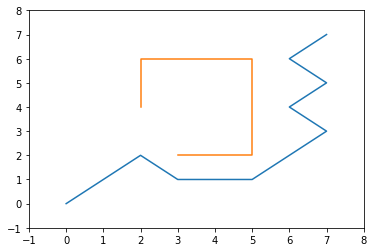

In [6]:
from __future__ import print_function
import matplotlib.pyplot as plt
 
class AStarGraph(object):
	#Define a class board like grid with two barriers
 
	def __init__(self):
		self.barriers = []
		self.barriers.append([(2,4),(2,5),(2,6),(3,6),(4,6),(5,6),(5,5),(5,4),(5,3),(5,2),(4,2),(3,2)])
 
	def heuristic(self, start, goal):
		#Use Chebyshev distance heuristic if we can move one square either
		#adjacent or diagonal
		D = 1
		D2 = 1
		dx = abs(start[0] - goal[0])
		dy = abs(start[1] - goal[1])
		return D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)
 
	def get_vertex_neighbours(self, pos):
		n = []
		#Moves allow link a chess king
		for dx, dy in [(1,0),(-1,0),(0,1),(0,-1),(1,1),(-1,1),(1,-1),(-1,-1)]:
			x2 = pos[0] + dx
			y2 = pos[1] + dy
			if x2 < 0 or x2 > 7 or y2 < 0 or y2 > 7:
				continue
			n.append((x2, y2))
		return n
 
	def move_cost(self, a, b):
		for barrier in self.barriers:
			if b in barrier:
				return 100 #Extremely high cost to enter barrier squares
		return 1 #Normal movement cost
 
def AStarSearch(start, end, graph):
 
	G = {} #Actual movement cost to each position from the start position
	F = {} #Estimated movement cost of start to end going via this position
 
	#Initialize starting values
	G[start] = 0 
	F[start] = graph.heuristic(start, end)
 
	closedVertices = set()
	openVertices = set([start])
	cameFrom = {}
 
	while len(openVertices) > 0:
		#Get the vertex in the open list with the lowest F score
		current = None
		currentFscore = None
		for pos in openVertices:
			if current is None or F[pos] < currentFscore:
				currentFscore = F[pos]
				current = pos
 
		#Check if we have reached the goal
		if current == end:
			#Retrace our route backward
			path = [current]
			while current in cameFrom:
				current = cameFrom[current]
				path.append(current)
			path.reverse()
			return path, F[end] #Done!
 
		#Mark the current vertex as closed
		openVertices.remove(current)
		closedVertices.add(current)
 
		#Update scores for vertices near the current position
		for neighbour in graph.get_vertex_neighbours(current):
			if neighbour in closedVertices: 
				continue #We have already processed this node exhaustively
			candidateG = G[current] + graph.move_cost(current, neighbour)
 
			if neighbour not in openVertices:
				openVertices.add(neighbour) #Discovered a new vertex
			elif candidateG >= G[neighbour]:
				continue #This G score is worse than previously found
 
			#Adopt this G score
			cameFrom[neighbour] = current
			G[neighbour] = candidateG
			H = graph.heuristic(neighbour, end)
			F[neighbour] = G[neighbour] + H
 
	raise RuntimeError("A* failed to find a solution")
 
if __name__=="__main__":
	graph = AStarGraph()
	result, cost = AStarSearch((0,0), (7,7), graph)
	print ("route", result)
	print ("cost", cost)
	plt.plot([v[0] for v in result], [v[1] for v in result])
	for barrier in graph.barriers:
		plt.plot([v[0] for v in barrier], [v[1] for v in barrier])
	plt.xlim(-1,8)
	plt.ylim(-1,8)
	plt.show()

In [4]:
%matplotlib inline

In [13]:
from collections import deque

class Graph:
    # example of adjacency list (or rather map)
    # adjacency_list = {
    # 'A': [('B', 1), ('C', 3), ('D', 7)],
    # 'B': [('D', 5)],
    # 'C': [('D', 12)]
    # }

    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    # heuristic function with equal values for all nodes
    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1
        }

        return H[n]

    def a_star_algorithm(self, start_node, stop_node):
        # open_list is a list of nodes which have been visited, but who's neighbors
        # haven't all been inspected, starts off with the start node
        # closed_list is a list of nodes which have been visited
        # and who's neighbors have been inspected
        open_list = set([start_node])
        closed_list = set([])

        # g contains current distances from start_node to all other nodes
        # the default value (if it's not found in the map) is +infinity
        g = {}

        g[start_node] = 0

        # parents contains an adjacency map of all nodes
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None

            # find a node with the lowest value of f() - evaluation function
            for v in open_list:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()
                print(g)
                print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
                # if the current node isn't in both open_list and closed_list
                # add it to open_list and note n as it's parent
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update parent data and g data
                # and if the node was in the closed_list, move it to open_list
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None

In [27]:
adjacency_list = {
    'A': [('B', 1), ('C', 3), ('D', 7)],
    'B': [('D', 5)],
    'C': [('D', 12)]
}
graph1 = Graph(adjacency_list)

graph1.a_star_algorithm('A', 'D')

Path found: ['A', 'B', 'D'] Cost=6


['A', 'B', 'D']

In [85]:
# Author: Christian Careaga (christian.careaga7@gmail.com)
# A* Pathfinding in Python (2.7)
# Please give credit if used

import numpy
from heapq import *


def heuristic(a, b):
    #print(a,b)
    return (b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2

def astar(array, start, goal):

    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]

    close_set = set()
    came_from = {}
    gscore = {start:0}
    print(gscore)
    fscore = {start:heuristic(start, goal)}
    print(fscore)
    oheap = []

    heappush(oheap, (fscore[start], start))
   
    while oheap:
        #print(oheap)
        current = heappop(oheap)[1]

        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            data.reverse()
            return data

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j            
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue
           
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
                
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                print('h',tentative_g_score,gscore,neighbor)
                gscore[neighbor] = tentative_g_score
                print(tentative_g_score,gscore,neighbor)
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heappush(oheap, (fscore[neighbor], neighbor))
                
    return False

'''Here is an example of using my algo with a numpy array,
   astar(array, start, destination)
   astar function returns a list of points (shortest path)'''

nmap = numpy.array([
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,1,1,1,1,1,1,1,1,1,0,1],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [1,1,1,1,1,0,1,1,1,1,1,1,1,1],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,1,1,1,1,1,1,0,1],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,1,1,1,1,1,1,1,1,1,1,1],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,1,1,1,1,1,1,0,1],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
    
print(astar(nmap, (0,0), (0,4)))

{(0, 0): 0}
{(0, 0): 16}
h 1 {(0, 0): 0} (0, 1)
1 {(0, 0): 0, (0, 1): 1} (0, 1)
h 2 {(0, 0): 0, (0, 1): 1} (0, 2)
2 {(0, 0): 0, (0, 1): 1, (0, 2): 2} (0, 2)
h 3 {(0, 0): 0, (0, 1): 1, (0, 2): 2} (1, 2)
3 {(0, 0): 0, (0, 1): 1, (0, 2): 2, (1, 2): 3} (1, 2)
h 3 {(0, 0): 0, (0, 1): 1, (0, 2): 2, (1, 2): 3} (0, 3)
3 {(0, 0): 0, (0, 1): 1, (0, 2): 2, (1, 2): 3, (0, 3): 3} (0, 3)
h 4 {(0, 0): 0, (0, 1): 1, (0, 2): 2, (1, 2): 3, (0, 3): 3} (0, 4)
4 {(0, 0): 0, (0, 1): 1, (0, 2): 2, (1, 2): 3, (0, 3): 3, (0, 4): 4} (0, 4)
[(0, 1), (0, 2), (0, 3), (0, 4)]


In [63]:
print(C.reverse())

None


In [66]:
a.reverse()

In [71]:
os = [(0, 4), (0, 3), (0, 2), (0, 1)]
print('Original List:', os)

# List Reverse
os.reverse()

# updated list
print('Updated List:', os)

Original List: [(0, 4), (0, 3), (0, 2), (0, 1)]
Updated List: [(0, 1), (0, 2), (0, 3), (0, 4)]


In [1]:
set(['A'])

{'A'}

In [4]:
g={}
g['A']='A'
g

{'A': 'A'}

In [5]:
for (m, weight) in [('B', 1), ('C', 4), ('D', 7)]:
    print(m,weight)

B 1
C 4
D 7


In [19]:
class Graph:
    def __init__(self,adj_list):
        self.adj_list=adj_list
    def getNeghb(self,v):
        return self.adj_list[v]
    def h(self,n):
        H={'A':1,'B':8,'C':1,'D':1}
        return H[n]
    def astar(self,start,stop):
        o=set([start])
        c=set([])
        g={}
        g[start]=0
        parent={}
        parent[start]=start
        while len(o)>0:
            n=None
            for v in o:
                if n==None or g[v]+self.h(v) < g[n]+self.h(n):
                    n=v
            if n==None:
                print("No Sol")
                return None
            if n==stop:
                pl=[]
                while parent[n]!=n:
                    pl.append(n)
                    n=parent[n]
                pl.append(n)
                pl.reverse()
                return pl
            for (m,w) in self.getNeghb(n):
                if m not in o and m not in c:
                    o.add(m)
                    parent[m]=n
                    g[m]=g[n]+w
                elif g[m]>g[n]+w:
                    g[m]=g[n]+w
                    parent[m]=n
                    if m in c:
                        c.remove(m)
                        o.add(m)
            o.remove(n)
            c.add(n)
                
al={'A': [('B', 1), ('C', 4), ('D', 7)],
    'B': [('C', 2)],
    'C': [('D', 3)]
    
}                
g=Graph(al)

g.astar('A','D')               
            

['A', 'D']

In [26]:
[[0 for x in range(9)]for y in range(9)] 

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [74]:
def findEmpty(arr,l):
    for i in range(9):
        for j in range(9):
            if arr[i][j]==0:
                l[0]=i
                l[1]=j
                return True
    return False
def used_in_row(arr,row,num):
    for i in arr[row]:
        if i==num:
            return True
    return False
def used_in_col(arr,col,num):
    for i in range(9):
        if arr[i][col]==num:
            return True
    return False
def used_in_box(arr,row,col,num):
    for i in range(3):
        for j in range(3):
            if arr[i+row][j+col]==num:
                return True
    return False


def isSafe(arr,row,col,num):
    return not used_in_row(arr,row,num) and not used_in_col(arr,col,num) and not used_in_box(arr,row-row%3,col-col%3,num)
def solve(arr):
    l=[0,0]
    if(not findEmpty(arr,l)):
        return True
    for i in range(1,10):
        if(isSafe(arr,l[0],l[1],i)):
            arr[l[0]][l[1]]=i
            if(solve(arr)):
                return True
            arr[l[0]][l[1]]=0
    for i in arr:
            print(i,end='\n')
    return False
if __name__=="__main__":
    arr=[[1 for i in range(9)] for j in range(9)]
    arr=[[3,0,6,5,0,8,4,0,0], 
		[5,2,0,0,0,0,0,0,0], 
		[0,8,7,0,0,0,0,3,1], 
		[0,0,3,0,1,0,0,8,0], 
		[9,0,0,8,6,3,0,0,5], 
		[0,5,0,0,9,0,6,0,0], 
		[1,3,0,0,0,0,2,5,0], 
		[0,0,0,0,0,0,0,7,4], 
		[4,7,5,2,0,6,3,0,0]] 
    if(solve(arr)):
        for i in arr:
            print(i,end='\n')
    else:
        print("no solution")
    

[3, 1, 6, 5, 2, 8, 4, 9, 7]
[5, 2, 4, 1, 3, 7, 8, 6, 0]
[0, 8, 7, 0, 0, 0, 0, 3, 1]
[0, 0, 3, 0, 1, 0, 0, 8, 0]
[9, 0, 0, 8, 6, 3, 0, 0, 5]
[0, 5, 0, 0, 9, 0, 6, 0, 0]
[1, 3, 0, 0, 0, 0, 2, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 7, 4]
[4, 7, 5, 2, 0, 6, 3, 0, 0]
[3, 1, 6, 5, 2, 8, 4, 9, 7]
[5, 2, 4, 1, 3, 7, 8, 0, 0]
[0, 8, 7, 0, 0, 0, 0, 3, 1]
[0, 0, 3, 0, 1, 0, 0, 8, 0]
[9, 0, 0, 8, 6, 3, 0, 0, 5]
[0, 5, 0, 0, 9, 0, 6, 0, 0]
[1, 3, 0, 0, 0, 0, 2, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 7, 4]
[4, 7, 5, 2, 0, 6, 3, 0, 0]
[3, 1, 6, 5, 2, 8, 4, 9, 7]
[5, 2, 4, 1, 3, 7, 0, 0, 0]
[0, 8, 7, 0, 0, 0, 0, 3, 1]
[0, 0, 3, 0, 1, 0, 0, 8, 0]
[9, 0, 0, 8, 6, 3, 0, 0, 5]
[0, 5, 0, 0, 9, 0, 6, 0, 0]
[1, 3, 0, 0, 0, 0, 2, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 7, 4]
[4, 7, 5, 2, 0, 6, 3, 0, 0]
[3, 1, 6, 5, 2, 8, 4, 9, 7]
[5, 2, 4, 1, 3, 9, 8, 6, 0]
[0, 8, 7, 0, 0, 0, 0, 3, 1]
[0, 0, 3, 0, 1, 0, 0, 8, 0]
[9, 0, 0, 8, 6, 3, 0, 0, 5]
[0, 5, 0, 0, 9, 0, 6, 0, 0]
[1, 3, 0, 0, 0, 0, 2, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 7, 4]
[4, 7, 5, 2, 0, 6, 3

[0, 0, 3, 0, 1, 0, 0, 8, 0]
[9, 0, 0, 8, 6, 3, 0, 0, 5]
[0, 5, 0, 0, 9, 0, 6, 0, 0]
[1, 3, 0, 0, 0, 0, 2, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 7, 4]
[4, 7, 5, 2, 0, 6, 3, 0, 0]
[3, 1, 6, 5, 7, 8, 4, 9, 2]
[5, 2, 4, 1, 3, 9, 8, 0, 0]
[0, 8, 7, 0, 0, 0, 0, 3, 1]
[0, 0, 3, 0, 1, 0, 0, 8, 0]
[9, 0, 0, 8, 6, 3, 0, 0, 5]
[0, 5, 0, 0, 9, 0, 6, 0, 0]
[1, 3, 0, 0, 0, 0, 2, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 7, 4]
[4, 7, 5, 2, 0, 6, 3, 0, 0]
[3, 1, 6, 5, 7, 8, 4, 9, 2]
[5, 2, 4, 1, 3, 9, 0, 0, 0]
[0, 8, 7, 0, 0, 0, 0, 3, 1]
[0, 0, 3, 0, 1, 0, 0, 8, 0]
[9, 0, 0, 8, 6, 3, 0, 0, 5]
[0, 5, 0, 0, 9, 0, 6, 0, 0]
[1, 3, 0, 0, 0, 0, 2, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 7, 4]
[4, 7, 5, 2, 0, 6, 3, 0, 0]
[3, 1, 6, 5, 7, 8, 4, 9, 2]
[5, 2, 4, 1, 3, 0, 0, 0, 0]
[0, 8, 7, 0, 0, 0, 0, 3, 1]
[0, 0, 3, 0, 1, 0, 0, 8, 0]
[9, 0, 0, 8, 6, 3, 0, 0, 5]
[0, 5, 0, 0, 9, 0, 6, 0, 0]
[1, 3, 0, 0, 0, 0, 2, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 7, 4]
[4, 7, 5, 2, 0, 6, 3, 0, 0]
[3, 1, 6, 5, 7, 8, 4, 9, 2]
[5, 2, 4, 1, 0, 0, 0, 0, 0]
[0, 8, 7, 0, 0, 0, 0

In [73]:
arr

[[3, 0, 6, 5, 0, 8, 4, 0, 0],
 [5, 2, 0, 0, 0, 0, 0, 0, 0],
 [0, 8, 7, 0, 0, 0, 0, 3, 1],
 [0, 0, 3, 0, 1, 0, 0, 8, 0],
 [9, 0, 0, 8, 6, 3, 0, 0, 5],
 [0, 5, 0, 0, 9, 0, 6, 0, 0],
 [1, 3, 0, 0, 0, 0, 2, 5, 0],
 [0, 0, 0, 0, 0, 0, 0, 7, 4],
 [4, 7, 5, 2, 0, 6, 3, 0, 0]]

In [56]:
class Nqueens:
    def __init__(self,size):
        self.size=size
        self.sol=0
        self.dim=[[]]
        self.solve()
        
    def solve(self):
        pos=[-1]*self.size
        self.putQueen(pos,0)
        print(self.sol)
    def putQueen(self,pos,tr):
        if tr==self.size:
            print('ani',pos)
            self.dim.append(pos)
            print(self.dim)
            self.sol+=1
        else:
            for i in range(self.size):
                if self.checkSafe(pos,tr,i):
                    pos[tr]=i
                    self.putQueen(pos,tr+1)
                    
    def checkSafe(self,pos,ocr,col):
        for i in range(ocr):
            if pos[i]==col or pos[i]-i==col-ocr or pos[i]+i==col+ocr:
                return False
        return True
        


In [57]:
pos=Nqueens(4)
pos.dim

ani [1, 3, 0, 2]
[[], [1, 3, 0, 2]]
ani [2, 0, 3, 1]
[[], [2, 0, 3, 1], [2, 0, 3, 1]]
2


[[], [3, 1, 2, 1], [3, 1, 2, 1]]

In [47]:
line=""
for pos in pos.dim:
    for row in range(4):
        for col in range(4):
            if pos[row]==col:
                line+="Q "
            else:
                line+=". "
        line+="\n"
    print()


In [48]:
print(line)

. . . Q 
. Q . . 
. . Q . 
. Q . . 
. . . Q 
. Q . . 
. . Q . 
. Q . . 



In [5]:
import random
def tic():
    b=[1,2,3,4,5,6,7,8,9]
    c=0
    win=[(0,1,2),(3,4,5),(6,7,8),(0,3,6),(1,4,7),(2,5,8),(0,4,8),(2,4,6)]
    foo=[1,2,3,4,5,6,7,8,9]
    end=False
    def draw():
        print(b[0],b[1],b[2])
        print(b[3],b[4],b[5])
        print(b[6],b[7],b[8])
    def choose():
        while True:
            while True:
                a=input()
                try:
                    a=int(a)
                    a=a-1
                    if a in range(0,9):
                        if not b[a]=='X' or b[a]=='O':
                            return a
                        else:
                            print("You can't go there")
                    else:
                        print("You can't go there")
                except ValueError:
                    print("Not a number")
                    continue
                    
    def play(v):
        n=choose()
        b[n]=v
        foo.remove(n+1)
    def play_bot(c):
        n=random.choice(foo)
        b[n-1]=c
        foo.remove(n)
        
        
    def check():
        for i in win:
            if(b[i[0]]==b[i[1]]==b[i[2]]):
                if b[i[0]]=='X':
                    print("P1 wins")
                else:
                    print('P2 wins')
                return True
        if c==9:
            print("Tie..No fighting")
            return True
        return False
    draw()               
    while not end:    
        
        end=check()
        print("Player 1 choose where to play 'X'")
        play('X')
        c+=1
        draw()
        end=check()
        if(end):
            break
        print("Player 2 choose where to play 'O'")
        play_bot('O')
        c+=1
        draw()
        end=check()
    if input('play(y/n)\n')=='y':
        print()
        tic()
        
        
tic()

1 2 3
4 5 6
7 8 9
Player 1 choose where to play 'X'
1
X 2 3
4 5 6
7 8 9
Player 2 choose where to play 'O'
X 2 3
4 5 6
7 O 9
Player 1 choose where to play 'X'
6
X 2 3
4 5 X
7 O 9
Player 2 choose where to play 'O'
X 2 3
4 5 X
O O 9
Player 1 choose where to play 'X'
4
X 2 3
X 5 X
O O 9
Player 2 choose where to play 'O'
X O 3
X 5 X
O O 9
Player 1 choose where to play 'X'
3
X O X
X 5 X
O O 9
Player 2 choose where to play 'O'
X O X
X 5 X
O O O
P2 wins
play(y/n)
n


In [127]:
ps=100
genes="qwertGyuiopasdfghjklzxcvbnm,1234567890 "
target="Ghost"
class Ind:
    def __init__(self,ch):
        self.chromosome=ch
        self.fitness=self.calFit()
    @classmethod
    def mutedGenes(self):
        global genes
        return random.choice(genes)
    @classmethod
    def createGnome(self):
        global target
        t_len=len(target)
        return [self.mutedGenes() for _ in range(t_len)]
    def mate(self,p2):
        child_chromosome=[]
        for gp1,gp2 in zip(self.chromosome,p2.chromosome):
            prob=random.random()
            if prob<0.45:
                child_chromosome.append(gp1)
            elif prob<0.90:
                child_chromosome.append(gp2)
            else:
                child_chromosome.append(self.mutedGenes())
        return Ind(child_chromosome)
    def calFit(self):
        global target
        fitness=0
        for gs,gp in zip(self.chromosome,target):
            if gs!=gp:
                fitness+=1
        return fitness
       
        
def main():
    global ps
    gen=1
    found=False
    pop=[]
    for i in range(ps):
        gnome=Ind.createGnome()
        pop.append(Ind(gnome))
    
    while not found:
        pop=sorted(pop,key=lambda x:x.fitness)
        if(pop[0].fitness<=0):
            found=True
            print("Generation: {}\tString: {}\tFitness: {}".format(gen, "".join(pop[0].chromosome),pop[0].fitness))
            break
        new_gen=[]
        s=int(10*ps/100)
        new_gen.extend(pop[:s])
        s=int(90*ps/100)
        for _ in range(s):
            p1=random.choice(pop[:50])
            p2=random.choice(pop[:50])
            new_gen.append(p1.mate(p2))
        pop=new_gen
        print("Generation: {}\tString: {}\tFitness: {}".format(gen, "".join(pop[0].chromosome),pop[0].fitness))
        gen+=1
    
    
if __name__ == '__main__':
    main() 

Generation: 1	String: Gaoyg	Fitness: 3
Generation: 2	String: Gaoyg	Fitness: 3
Generation: 3	String: Gaoyg	Fitness: 3
Generation: 4	String: Gjodt	Fitness: 2
Generation: 5	String: Gjodt	Fitness: 2
Generation: 6	String: Gjost	Fitness: 1
Generation: 7	String: Gjost	Fitness: 1
Generation: 8	String: Gjost	Fitness: 1
Generation: 9	String: Gjost	Fitness: 1
Generation: 10	String: Gjost	Fitness: 1
Generation: 11	String: Gjost	Fitness: 1
Generation: 12	String: Gjost	Fitness: 1
Generation: 13	String: Gjost	Fitness: 1
Generation: 14	String: Gjost	Fitness: 1
Generation: 15	String: Gjost	Fitness: 1
Generation: 16	String: Gjost	Fitness: 1
Generation: 17	String: Gjost	Fitness: 1
Generation: 18	String: Gjost	Fitness: 1
Generation: 19	String: Gjost	Fitness: 1
Generation: 20	String: Gjost	Fitness: 1
Generation: 21	String: Gjost	Fitness: 1
Generation: 22	String: Gjost	Fitness: 1
Generation: 23	String: Gjost	Fitness: 1
Generation: 24	String: Ghost	Fitness: 0


In [67]:
import math
def minmax(cd,Ind,maxTurn,td,scores):
    if cd==td:
        return scores[Ind]
    if maxTurn:
        return max(minmax(cd+1,Ind*2,False,td,scores),minmax(cd+1,Ind*2+1,False,td,scores))
    else:
        return min(minmax(cd+1,Ind*2,True,td,scores),minmax(cd+1,Ind*2,True,td,scores))
scores=[1,1,6,2,2,1,9,5]
minmax(0,0,True,math.log2(len(scores)),scores)

2

In [98]:
MAX,MIN=1000,-1000
pruned=0
def alpha_beta(cd,Ind,maxTurn,td,scores,alpha,beta):
    global pruned
    if cd==td:
        return scores[Ind]
    if maxTurn:
        best=MIN
        for i in [0,1]:
            val=alpha_beta(cd+1,Ind*2+i,False,td,scores,alpha,beta)
            best=max(best,val)
            alpha=max(best,alpha)
            if(beta<=alpha):
                pruned+=1
                break
        return best
    else:
        best=MAX
        for i in [0,1]:
            val=alpha_beta(cd+1,Ind*2+i,True,td,scores,alpha,beta)
            best=min(best,val)
            beta=min(best,alpha)
            if(beta<=alpha):
                pruned+=1
                break
        return best
scores=[3,5,6,9,1,2,0,-1]
print(alpha_beta(0,0,True,math.log2(len(scores)),scores,MIN,MAX))
pruned

5


2

In [168]:
import numpy as np
class NeuralNet:
    def __init__(self):
        np.random.seed(1)
        self.weight=2*np.random.random((3,1))-1
    def tanh(self,x):
        return np.tanh(x)
    def der_tanh(self,x):
        return 1.0-np.tanh(x)**2
    def fp(self,inputs):
        return np.tanh(np.dot(inputs,self.weight))
    def train(self,train_inputs,train_outputs,it):
        for i in range(it):
            output=self.fp(train_inputs)
            error=train_outputs-output
            adj=np.dot(train_inputs.T,error*self.der_tanh(output))
            self.weight+=adj

        

In [171]:
model=NeuralNet()
print(model.weight)
ti=np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]])
to=np.array([[0,1,1,0]]).T
model.train(ti,to,10000)
model.weight
print(model.fp(np.array([1,1,1])))

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
[0.99998593]


In [190]:
import matplotlib.pyplot as plt
import numpy as np # numpy has been imported
from sklearn import datasets, linear_model # datasets are being imported through library
from sklearn.metrics import mean_squared_error

diabetes = datasets.load_diabetes()
# print(diabetes) # diabetes consists of various attributes
print(diabetes.keys()) # it displays all the columns 
# mydata ['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename']
#print(diabetes.DESCR)
diabetes_X = diabetes.data[:, np.newaxis, 2] #array slicing is done for num pi
# two columns are selected and all the values are taken

diabetes_X[0:5]

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469]])

In [191]:
print(diabetes['feature_names'])
diabetes.data[0]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [192]:
diabetes_X[0]

array([0.06169621])

In [194]:
diabetes.target[0]

151.0

[[1.16666667 1.46666667]
 [7.33333333 9.        ]]
[0 1 0 1 0 1]
coordinate: [1. 2.] label: 0
coordinate: [5. 8.] label: 1
coordinate: [1.5 1.8] label: 0
coordinate: [8. 8.] label: 1
coordinate: [1.  0.6] label: 0
coordinate: [ 9. 11.] label: 1


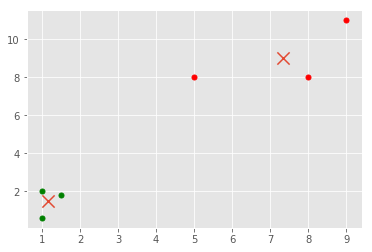

In [205]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

X = np.array([[1, 2],
              [5, 8],
              [1.5, 1.8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)
colors = ["g.","r.","c.","y."]
for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)    
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)    
plt.show()    

In [203]:
centroids[:, 1]

array([9.        , 1.46666667])

In [414]:
import numpy

def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = numpy.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = 6

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 8
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

num_generations = 15000
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measing the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(equation_inputs, new_population)

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))

    # Adding some variations to the offsrping using mutation.
    offspring_mutation =mutation(offspring_crossover)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))

# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

[[-3.42669886 -1.70846785 -3.08642801 -0.24459812 -2.03469936  1.26564776]
 [-3.58894424 -2.53443471  1.49444921 -0.94308849  2.44260914 -3.09454536]
 [-2.11075425 -0.32473623  3.39781744 -0.43714373  3.85160168 -1.29865534]
 [ 3.30166768  1.26740665  0.22705577  1.47528686 -3.87683992 -3.13636683]
 [-3.32755944  0.84413067  3.1332727   2.52148921 -0.58564949  1.10196275]
 [-3.91490245  0.59233371 -3.20299537 -3.06041437 -3.90020634 -2.83805542]
 [ 1.69295388 -0.76275673 -1.10533233 -3.07746005  3.14585115  0.32570952]
 [-1.97704856  1.10166261 -0.52130141  0.8501497   0.63012812  3.21612115]]
Generation :  0
Best result :  76.2291501176576
Generation :  1
Best result :  94.16539384965392
Generation :  2
Best result :  94.16539384965392
Generation :  3
Best result :  95.06759795129643
Generation :  4
Best result :  97.83803237999194
Generation :  5
Best result :  103.36513177943934
Generation :  6
Best result :  113.86874401032819
Generation :  7
Best result :  113.86874401032819
Gener

Generation :  261
Best result :  1158.104086203576
Generation :  262
Best result :  1166.3534073040532
Generation :  263
Best result :  1166.3534073040532
Generation :  264
Best result :  1169.1533808979818
Generation :  265
Best result :  1172.094875809082
Generation :  266
Best result :  1172.6857409924064
Generation :  267
Best result :  1181.5418738724672
Generation :  268
Best result :  1190.2566876654728
Generation :  269
Best result :  1190.2566876654728
Generation :  270
Best result :  1196.3367855713705
Generation :  271
Best result :  1206.8093072287543
Generation :  272
Best result :  1207.9476800334826
Generation :  273
Best result :  1212.923766278467
Generation :  274
Best result :  1221.8071078785222
Generation :  275
Best result :  1224.6001512931214
Generation :  276
Best result :  1227.4488389652709
Generation :  277
Best result :  1227.4488389652709
Generation :  278
Best result :  1233.0982429911082
Generation :  279
Best result :  1239.2757785211606
Generation :  2

Generation :  511
Best result :  2183.05484145979
Generation :  512
Best result :  2189.750941122366
Generation :  513
Best result :  2199.0798549147453
Generation :  514
Best result :  2205.1002605907497
Generation :  515
Best result :  2205.1002605907497
Generation :  516
Best result :  2210.478061309903
Generation :  517
Best result :  2210.478061309903
Generation :  518
Best result :  2210.478061309903
Generation :  519
Best result :  2213.9373313765427
Generation :  520
Best result :  2223.567273468657
Generation :  521
Best result :  2232.1377933266754
Generation :  522
Best result :  2232.1377933266754
Generation :  523
Best result :  2232.670827077193
Generation :  524
Best result :  2232.749985710758
Generation :  525
Best result :  2241.60937346615
Generation :  526
Best result :  2241.60937346615
Generation :  527
Best result :  2241.60937346615
Generation :  528
Best result :  2245.3179324248117
Generation :  529
Best result :  2249.9481631700346
Generation :  530
Best resu

Generation :  761
Best result :  3160.7009916352663
Generation :  762
Best result :  3160.7009916352663
Generation :  763
Best result :  3165.507940614041
Generation :  764
Best result :  3172.0679330085504
Generation :  765
Best result :  3177.3642015644027
Generation :  766
Best result :  3181.499552670497
Generation :  767
Best result :  3181.499552670497
Generation :  768
Best result :  3181.499552670497
Generation :  769
Best result :  3186.247680070943
Generation :  770
Best result :  3188.5021123712545
Generation :  771
Best result :  3188.5021123712545
Generation :  772
Best result :  3188.5021123712545
Generation :  773
Best result :  3196.499511647668
Generation :  774
Best result :  3202.2744020344794
Generation :  775
Best result :  3202.2744020344794
Generation :  776
Best result :  3206.9636780245987
Generation :  777
Best result :  3207.735962881125
Generation :  778
Best result :  3214.0218209099216
Generation :  779
Best result :  3214.0218209099216
Generation :  780
B

Best result :  4201.329387002899
Generation :  1011
Best result :  4204.495111544048
Generation :  1012
Best result :  4207.983659326264
Generation :  1013
Best result :  4216.7551149023375
Generation :  1014
Best result :  4216.7551149023375
Generation :  1015
Best result :  4226.3448641894975
Generation :  1016
Best result :  4237.13269461993
Generation :  1017
Best result :  4238.290160628624
Generation :  1018
Best result :  4243.801882504405
Generation :  1019
Best result :  4246.3879526240435
Generation :  1020
Best result :  4255.978623493533
Generation :  1021
Best result :  4258.9054047457485
Generation :  1022
Best result :  4266.933908390864
Generation :  1023
Best result :  4277.925706692412
Generation :  1024
Best result :  4278.136572338281
Generation :  1025
Best result :  4284.955674449998
Generation :  1026
Best result :  4284.955674449998
Generation :  1027
Best result :  4289.976456643909
Generation :  1028
Best result :  4297.257553372381
Generation :  1029
Best res

Best result :  5213.923795231939
Generation :  1247
Best result :  5213.923795231939
Generation :  1248
Best result :  5222.7526737966355
Generation :  1249
Best result :  5222.7526737966355
Generation :  1250
Best result :  5222.7526737966355
Generation :  1251
Best result :  5232.9227340752705
Generation :  1252
Best result :  5232.9227340752705
Generation :  1253
Best result :  5237.260790498955
Generation :  1254
Best result :  5238.298085251935
Generation :  1255
Best result :  5245.166582989982
Generation :  1256
Best result :  5250.752504054734
Generation :  1257
Best result :  5250.752504054734
Generation :  1258
Best result :  5258.31383313501
Generation :  1259
Best result :  5264.999630941452
Generation :  1260
Best result :  5266.472304272925
Generation :  1261
Best result :  5274.952133007416
Generation :  1262
Best result :  5276.363622222111
Generation :  1263
Best result :  5278.714882284556
Generation :  1264
Best result :  5287.0187586816355
Generation :  1265
Best re

Generation :  1417
Best result :  5919.437354823569
Generation :  1418
Best result :  5928.478025480473
Generation :  1419
Best result :  5928.478025480473
Generation :  1420
Best result :  5932.198164691558
Generation :  1421
Best result :  5932.198164691558
Generation :  1422
Best result :  5939.352019665258
Generation :  1423
Best result :  5942.407720435578
Generation :  1424
Best result :  5945.454423195042
Generation :  1425
Best result :  5952.500292714484
Generation :  1426
Best result :  5960.995391189072
Generation :  1427
Best result :  5964.915775722893
Generation :  1428
Best result :  5964.915775722893
Generation :  1429
Best result :  5966.40775637689
Generation :  1430
Best result :  5971.3810529367465
Generation :  1431
Best result :  5977.642004637621
Generation :  1432
Best result :  5978.862582685112
Generation :  1433
Best result :  5978.862582685112
Generation :  1434
Best result :  5980.9856662272605
Generation :  1435
Best result :  5980.9856662272605
Generation

Best result :  6706.575743852795
Generation :  1612
Best result :  6710.005783937147
Generation :  1613
Best result :  6710.005783937147
Generation :  1614
Best result :  6714.082607855853
Generation :  1615
Best result :  6723.074058101984
Generation :  1616
Best result :  6723.074058101984
Generation :  1617
Best result :  6733.524243792498
Generation :  1618
Best result :  6734.582448425456
Generation :  1619
Best result :  6734.582448425456
Generation :  1620
Best result :  6734.69606444575
Generation :  1621
Best result :  6740.603504963479
Generation :  1622
Best result :  6750.778087501706
Generation :  1623
Best result :  6756.242100355024
Generation :  1624
Best result :  6756.242100355024
Generation :  1625
Best result :  6764.337931951319
Generation :  1626
Best result :  6770.813135829306
Generation :  1627
Best result :  6770.813135829306
Generation :  1628
Best result :  6776.250541371898
Generation :  1629
Best result :  6779.977913059512
Generation :  1630
Best result :

Best result :  7656.661085188078
Generation :  1830
Best result :  7667.601225128106
Generation :  1831
Best result :  7667.601225128106
Generation :  1832
Best result :  7674.17051331707
Generation :  1833
Best result :  7682.532420009579
Generation :  1834
Best result :  7682.532420009579
Generation :  1835
Best result :  7693.505402528262
Generation :  1836
Best result :  7693.783039461772
Generation :  1837
Best result :  7693.783039461772
Generation :  1838
Best result :  7701.530320452193
Generation :  1839
Best result :  7709.488784955751
Generation :  1840
Best result :  7709.488784955751
Generation :  1841
Best result :  7709.488784955751
Generation :  1842
Best result :  7709.488784955751
Generation :  1843
Best result :  7716.297292824737
Generation :  1844
Best result :  7716.297292824737
Generation :  1845
Best result :  7718.650892527969
Generation :  1846
Best result :  7725.327132697481
Generation :  1847
Best result :  7727.256353180764
Generation :  1848
Best result :

Best result :  8553.487435708741
Generation :  2050
Best result :  8559.033903290843
Generation :  2051
Best result :  8564.94675860368
Generation :  2052
Best result :  8564.94675860368
Generation :  2053
Best result :  8571.39170674122
Generation :  2054
Best result :  8573.951566547958
Generation :  2055
Best result :  8577.20416200086
Generation :  2056
Best result :  8581.430202503512
Generation :  2057
Best result :  8587.834447014302
Generation :  2058
Best result :  8587.834447014302
Generation :  2059
Best result :  8597.393103566961
Generation :  2060
Best result :  8605.687240408024
Generation :  2061
Best result :  8605.687240408024
Generation :  2062
Best result :  8606.02520058191
Generation :  2063
Best result :  8606.02520058191
Generation :  2064
Best result :  8615.654995834073
Generation :  2065
Best result :  8624.071161259088
Generation :  2066
Best result :  8624.071161259088
Generation :  2067
Best result :  8629.269548586351
Generation :  2068
Best result :  863

Best result :  9380.645818559107
Generation :  2230
Best result :  9380.645818559107
Generation :  2231
Best result :  9385.05227722357
Generation :  2232
Best result :  9394.458564372244
Generation :  2233
Best result :  9399.291359077826
Generation :  2234
Best result :  9403.284343673127
Generation :  2235
Best result :  9410.012391848175
Generation :  2236
Best result :  9413.661293878597
Generation :  2237
Best result :  9414.355017160058
Generation :  2238
Best result :  9421.107231369588
Generation :  2239
Best result :  9421.107231369588
Generation :  2240
Best result :  9422.606807401276
Generation :  2241
Best result :  9424.96228744719
Generation :  2242
Best result :  9429.523444485185
Generation :  2243
Best result :  9434.499453571672
Generation :  2244
Best result :  9436.995964644779
Generation :  2245
Best result :  9442.424556017333
Generation :  2246
Best result :  9442.424556017333
Generation :  2247
Best result :  9449.63906118238
Generation :  2248
Best result :  

Generation :  2510
Best result :  10512.86553268971
Generation :  2511
Best result :  10512.86553268971
Generation :  2512
Best result :  10512.86553268971
Generation :  2513
Best result :  10522.779713073835
Generation :  2514
Best result :  10532.787505420172
Generation :  2515
Best result :  10533.92792290724
Generation :  2516
Best result :  10539.689470676618
Generation :  2517
Best result :  10540.41187726613
Generation :  2518
Best result :  10540.41187726613
Generation :  2519
Best result :  10540.41187726613
Generation :  2520
Best result :  10543.908897698006
Generation :  2521
Best result :  10551.1418934024
Generation :  2522
Best result :  10555.250458834198
Generation :  2523
Best result :  10563.966970881116
Generation :  2524
Best result :  10570.493054860812
Generation :  2525
Best result :  10576.419725397756
Generation :  2526
Best result :  10576.419725397756
Generation :  2527
Best result :  10581.398773859566
Generation :  2528
Best result :  10587.659422154116
Ge

Best result :  11511.567036239963
Generation :  2760
Best result :  11512.410908353178
Generation :  2761
Best result :  11518.808327926956
Generation :  2762
Best result :  11521.488489689156
Generation :  2763
Best result :  11526.047840865493
Generation :  2764
Best result :  11535.580914288103
Generation :  2765
Best result :  11535.580914288103
Generation :  2766
Best result :  11541.27482285025
Generation :  2767
Best result :  11541.27482285025
Generation :  2768
Best result :  11547.376976502122
Generation :  2769
Best result :  11549.83459874304
Generation :  2770
Best result :  11551.200903419918
Generation :  2771
Best result :  11551.200903419918
Generation :  2772
Best result :  11557.274817120264
Generation :  2773
Best result :  11557.274817120264
Generation :  2774
Best result :  11568.02187670449
Generation :  2775
Best result :  11571.12524842414
Generation :  2776
Best result :  11578.409004298246
Generation :  2777
Best result :  11582.45377547558
Generation :  2778

Best result :  12612.062005933945
Generation :  3010
Best result :  12621.046732582272
Generation :  3011
Best result :  12621.046732582272
Generation :  3012
Best result :  12625.990314532797
Generation :  3013
Best result :  12633.878641556794
Generation :  3014
Best result :  12639.178898581635
Generation :  3015
Best result :  12644.638629995095
Generation :  3016
Best result :  12646.005223262895
Generation :  3017
Best result :  12648.35169241061
Generation :  3018
Best result :  12653.784232056769
Generation :  3019
Best result :  12653.784232056769
Generation :  3020
Best result :  12660.056326239042
Generation :  3021
Best result :  12660.401736023847
Generation :  3022
Best result :  12668.064570902157
Generation :  3023
Best result :  12676.704276478511
Generation :  3024
Best result :  12676.704276478511
Generation :  3025
Best result :  12676.943914195803
Generation :  3026
Best result :  12682.159540274839
Generation :  3027
Best result :  12691.24760512588
Generation :  

Best result :  13575.410313929311
Generation :  3241
Best result :  13575.410313929311
Generation :  3242
Best result :  13584.708058481716
Generation :  3243
Best result :  13584.708058481716
Generation :  3244
Best result :  13594.125933001973
Generation :  3245
Best result :  13594.125933001973
Generation :  3246
Best result :  13597.469270189746
Generation :  3247
Best result :  13603.691553149383
Generation :  3248
Best result :  13609.763341484919
Generation :  3249
Best result :  13619.870723615344
Generation :  3250
Best result :  13619.870723615344
Generation :  3251
Best result :  13622.813425346822
Generation :  3252
Best result :  13622.813425346822
Generation :  3253
Best result :  13630.409316790634
Generation :  3254
Best result :  13632.828200956383
Generation :  3255
Best result :  13638.760201349889
Generation :  3256
Best result :  13645.116846188967
Generation :  3257
Best result :  13645.12122622678
Generation :  3258
Best result :  13654.74923956612
Generation :  

Best result :  14488.312625560899
Generation :  3475
Best result :  14490.126439934336
Generation :  3476
Best result :  14493.87560324056
Generation :  3477
Best result :  14493.87560324056
Generation :  3478
Best result :  14493.87560324056
Generation :  3479
Best result :  14498.74642164155
Generation :  3480
Best result :  14506.012161115676
Generation :  3481
Best result :  14508.844491014348
Generation :  3482
Best result :  14510.579492821034
Generation :  3483
Best result :  14519.764706543778
Generation :  3484
Best result :  14519.764706543778
Generation :  3485
Best result :  14527.59637536145
Generation :  3486
Best result :  14534.096215871074
Generation :  3487
Best result :  14537.238045183229
Generation :  3488
Best result :  14544.591736973925
Generation :  3489
Best result :  14552.57842653603
Generation :  3490
Best result :  14554.175140333153
Generation :  3491
Best result :  14564.703827034275
Generation :  3492
Best result :  14572.344150058158
Generation :  3493

Best result :  15398.539787555197
Generation :  3705
Best result :  15406.92244305483
Generation :  3706
Best result :  15409.038318820707
Generation :  3707
Best result :  15416.323734424137
Generation :  3708
Best result :  15421.802596665559
Generation :  3709
Best result :  15427.660650225665
Generation :  3710
Best result :  15427.660650225665
Generation :  3711
Best result :  15432.254104262716
Generation :  3712
Best result :  15438.436410461924
Generation :  3713
Best result :  15438.436410461924
Generation :  3714
Best result :  15448.336660465095
Generation :  3715
Best result :  15450.76395700241
Generation :  3716
Best result :  15454.783555553333
Generation :  3717
Best result :  15455.758455762932
Generation :  3718
Best result :  15461.53095213168
Generation :  3719
Best result :  15463.103200664524
Generation :  3720
Best result :  15467.696603604665
Generation :  3721
Best result :  15470.808221490133
Generation :  3722
Best result :  15477.536030488498
Generation :  3

Best result :  16443.957872469684
Generation :  3952
Best result :  16445.69597980538
Generation :  3953
Best result :  16451.793470726076
Generation :  3954
Best result :  16451.793470726076
Generation :  3955
Best result :  16454.92578689418
Generation :  3956
Best result :  16455.970608304197
Generation :  3957
Best result :  16463.816967649764
Generation :  3958
Best result :  16463.816967649764
Generation :  3959
Best result :  16463.816967649764
Generation :  3960
Best result :  16471.093785969228
Generation :  3961
Best result :  16480.444821226934
Generation :  3962
Best result :  16480.444821226934
Generation :  3963
Best result :  16480.444821226934
Generation :  3964
Best result :  16490.214629707472
Generation :  3965
Best result :  16494.19283691205
Generation :  3966
Best result :  16497.240260946193
Generation :  3967
Best result :  16500.98835631278
Generation :  3968
Best result :  16503.347315376657
Generation :  3969
Best result :  16506.992074630612
Generation :  39

Best result :  17404.152836749676
Generation :  4177
Best result :  17410.569614570926
Generation :  4178
Best result :  17414.002819987916
Generation :  4179
Best result :  17422.683740192486
Generation :  4180
Best result :  17428.79732036412
Generation :  4181
Best result :  17432.53759091535
Generation :  4182
Best result :  17432.53759091535
Generation :  4183
Best result :  17435.14090559956
Generation :  4184
Best result :  17435.14090559956
Generation :  4185
Best result :  17441.885419631675
Generation :  4186
Best result :  17441.885419631675
Generation :  4187
Best result :  17446.98838083046
Generation :  4188
Best result :  17447.421414583943
Generation :  4189
Best result :  17457.091839308432
Generation :  4190
Best result :  17459.14108548609
Generation :  4191
Best result :  17464.58428872669
Generation :  4192
Best result :  17464.58428872669
Generation :  4193
Best result :  17472.37323075828
Generation :  4194
Best result :  17473.142337926394
Generation :  4195
Bes

Best result :  18319.45209183302
Generation :  4401
Best result :  18322.97395472838
Generation :  4402
Best result :  18330.221940020925
Generation :  4403
Best result :  18341.17483839913
Generation :  4404
Best result :  18346.370956418654
Generation :  4405
Best result :  18346.50232544571
Generation :  4406
Best result :  18357.040133326536
Generation :  4407
Best result :  18365.583824518406
Generation :  4408
Best result :  18365.583824518406
Generation :  4409
Best result :  18367.426017238275
Generation :  4410
Best result :  18367.426017238275
Generation :  4411
Best result :  18378.085748859048
Generation :  4412
Best result :  18388.6374716758
Generation :  4413
Best result :  18388.6374716758
Generation :  4414
Best result :  18398.850120223127
Generation :  4415
Best result :  18401.075817762587
Generation :  4416
Best result :  18401.075817762587
Generation :  4417
Best result :  18401.075817762587
Generation :  4418
Best result :  18401.41032875155
Generation :  4419
Be

Best result :  19459.214885357276
Generation :  4685
Best result :  19463.065270231804
Generation :  4686
Best result :  19465.57891423375
Generation :  4687
Best result :  19469.362139267774
Generation :  4688
Best result :  19469.362139267774
Generation :  4689
Best result :  19475.14681839202
Generation :  4690
Best result :  19478.661155229143
Generation :  4691
Best result :  19482.323767427086
Generation :  4692
Best result :  19491.269548264052
Generation :  4693
Best result :  19498.786030757765
Generation :  4694
Best result :  19498.786030757765
Generation :  4695
Best result :  19505.102272722754
Generation :  4696
Best result :  19505.536893521148
Generation :  4697
Best result :  19505.536893521148
Generation :  4698
Best result :  19511.088260011406
Generation :  4699
Best result :  19511.088260011406
Generation :  4700
Best result :  19517.441292318814
Generation :  4701
Best result :  19525.69701672523
Generation :  4702
Best result :  19525.69701672523
Generation :  47

Generation :  4908
Best result :  20371.49016182347
Generation :  4909
Best result :  20373.84580934197
Generation :  4910
Best result :  20379.363206989416
Generation :  4911
Best result :  20389.641736716174
Generation :  4912
Best result :  20389.68365007776
Generation :  4913
Best result :  20399.110925825877
Generation :  4914
Best result :  20407.792723493927
Generation :  4915
Best result :  20415.347452556565
Generation :  4916
Best result :  20417.015688155516
Generation :  4917
Best result :  20421.113355032387
Generation :  4918
Best result :  20421.113355032387
Generation :  4919
Best result :  20424.86521958988
Generation :  4920
Best result :  20424.86521958988
Generation :  4921
Best result :  20429.73265453228
Generation :  4922
Best result :  20433.27197316616
Generation :  4923
Best result :  20438.151618688375
Generation :  4924
Best result :  20438.151618688375
Generation :  4925
Best result :  20443.48760821681
Generation :  4926
Best result :  20447.080371460874
G

Best result :  21305.99815146312
Generation :  5144
Best result :  21307.086687844734
Generation :  5145
Best result :  21307.815167914683
Generation :  5146
Best result :  21316.758481252542
Generation :  5147
Best result :  21319.97908782667
Generation :  5148
Best result :  21325.005485900885
Generation :  5149
Best result :  21328.512245136786
Generation :  5150
Best result :  21334.301641193913
Generation :  5151
Best result :  21344.223239924133
Generation :  5152
Best result :  21350.448537559907
Generation :  5153
Best result :  21356.738184217727
Generation :  5154
Best result :  21360.62909998846
Generation :  5155
Best result :  21370.472527373135
Generation :  5156
Best result :  21378.28096224639
Generation :  5157
Best result :  21378.28096224639
Generation :  5158
Best result :  21383.303053338128
Generation :  5159
Best result :  21389.2337088891
Generation :  5160
Best result :  21400.103513853286
Generation :  5161
Best result :  21400.103513853286
Generation :  5162


Best result :  22472.901395724526
Generation :  5400
Best result :  22483.08934353939
Generation :  5401
Best result :  22489.085095881746
Generation :  5402
Best result :  22493.002007919655
Generation :  5403
Best result :  22495.74090308755
Generation :  5404
Best result :  22495.74090308755
Generation :  5405
Best result :  22497.340330653446
Generation :  5406
Best result :  22505.992900679288
Generation :  5407
Best result :  22512.339934503045
Generation :  5408
Best result :  22515.194688750133
Generation :  5409
Best result :  22518.75694626828
Generation :  5410
Best result :  22518.75694626828
Generation :  5411
Best result :  22518.75694626828
Generation :  5412
Best result :  22520.487803333763
Generation :  5413
Best result :  22527.551739198298
Generation :  5414
Best result :  22528.617686238198
Generation :  5415
Best result :  22528.707563018095
Generation :  5416
Best result :  22534.444133274417
Generation :  5417
Best result :  22535.652996589306
Generation :  5418

Best result :  23499.60361223884
Generation :  5650
Best result :  23508.1857956169
Generation :  5651
Best result :  23508.1857956169
Generation :  5652
Best result :  23510.427882469234
Generation :  5653
Best result :  23512.731002756525
Generation :  5654
Best result :  23512.731002756525
Generation :  5655
Best result :  23512.731002756525
Generation :  5656
Best result :  23519.090404997693
Generation :  5657
Best result :  23523.080114913024
Generation :  5658
Best result :  23527.815832371
Generation :  5659
Best result :  23528.722918356056
Generation :  5660
Best result :  23535.99193630911
Generation :  5661
Best result :  23542.513800103203
Generation :  5662
Best result :  23547.36352629876
Generation :  5663
Best result :  23547.36352629876
Generation :  5664
Best result :  23553.972817675745
Generation :  5665
Best result :  23563.52537331653
Generation :  5666
Best result :  23567.436113614203
Generation :  5667
Best result :  23570.57136466641
Generation :  5668
Best r

Best result :  24537.32854076619
Generation :  5900
Best result :  24547.123357374992
Generation :  5901
Best result :  24556.718439143413
Generation :  5902
Best result :  24566.75259175117
Generation :  5903
Best result :  24566.75259175117
Generation :  5904
Best result :  24570.955034817467
Generation :  5905
Best result :  24574.31840982657
Generation :  5906
Best result :  24575.569816791995
Generation :  5907
Best result :  24582.855958104836
Generation :  5908
Best result :  24584.566638121283
Generation :  5909
Best result :  24594.46052182975
Generation :  5910
Best result :  24594.46052182975
Generation :  5911
Best result :  24594.98777295656
Generation :  5912
Best result :  24605.819276174963
Generation :  5913
Best result :  24615.749058015826
Generation :  5914
Best result :  24622.514423131724
Generation :  5915
Best result :  24624.713189489088
Generation :  5916
Best result :  24633.124161754007
Generation :  5917
Best result :  24633.860470551557
Generation :  5918


Best result :  25503.03735514664
Generation :  6130
Best result :  25511.35236131509
Generation :  6131
Best result :  25511.35236131509
Generation :  6132
Best result :  25515.32072191374
Generation :  6133
Best result :  25522.62267955898
Generation :  6134
Best result :  25525.605666603467
Generation :  6135
Best result :  25525.605666603467
Generation :  6136
Best result :  25529.819801629063
Generation :  6137
Best result :  25533.15731860259
Generation :  6138
Best result :  25533.878359421036
Generation :  6139
Best result :  25539.276931200202
Generation :  6140
Best result :  25546.66867388073
Generation :  6141
Best result :  25546.75240467565
Generation :  6142
Best result :  25555.698185596328
Generation :  6143
Best result :  25555.698185596328
Generation :  6144
Best result :  25563.323263850696
Generation :  6145
Best result :  25570.24784686905
Generation :  6146
Best result :  25576.742394256333
Generation :  6147
Best result :  25576.742394256333
Generation :  6148
Be

Best result :  26371.981942225128
Generation :  6337
Best result :  26371.981942225128
Generation :  6338
Best result :  26380.957430411843
Generation :  6339
Best result :  26380.957430411843
Generation :  6340
Best result :  26384.965032762535
Generation :  6341
Best result :  26384.965032762535
Generation :  6342
Best result :  26392.31429122932
Generation :  6343
Best result :  26392.31429122932
Generation :  6344
Best result :  26392.31429122932
Generation :  6345
Best result :  26399.124621932202
Generation :  6346
Best result :  26403.315229649164
Generation :  6347
Best result :  26408.215020165695
Generation :  6348
Best result :  26414.139315485943
Generation :  6349
Best result :  26414.139315485943
Generation :  6350
Best result :  26423.55407604923
Generation :  6351
Best result :  26423.55407604923
Generation :  6352
Best result :  26423.55407604923
Generation :  6353
Best result :  26425.508840171973
Generation :  6354
Best result :  26432.476736202792
Generation :  6355

Best result :  27207.393788560574
Generation :  6550
Best result :  27213.85966718295
Generation :  6551
Best result :  27224.17321571307
Generation :  6552
Best result :  27229.077521156396
Generation :  6553
Best result :  27234.60040738867
Generation :  6554
Best result :  27243.02238501864
Generation :  6555
Best result :  27243.02238501864
Generation :  6556
Best result :  27245.567637992932
Generation :  6557
Best result :  27248.11277351621
Generation :  6558
Best result :  27252.809061063537
Generation :  6559
Best result :  27255.405024421252
Generation :  6560
Best result :  27261.572160971158
Generation :  6561
Best result :  27261.572160971158
Generation :  6562
Best result :  27271.85344417655
Generation :  6563
Best result :  27279.164860683944
Generation :  6564
Best result :  27279.164860683944
Generation :  6565
Best result :  27287.178985864386
Generation :  6566
Best result :  27287.178985864386
Generation :  6567
Best result :  27292.538215573186
Generation :  6568


Best result :  28512.0432055112
Generation :  6864
Best result :  28512.0432055112
Generation :  6865
Best result :  28513.525085919784
Generation :  6866
Best result :  28519.843987917382
Generation :  6867
Best result :  28521.699631195825
Generation :  6868
Best result :  28528.147781490374
Generation :  6869
Best result :  28533.12734596637
Generation :  6870
Best result :  28533.12734596637
Generation :  6871
Best result :  28543.252127966596
Generation :  6872
Best result :  28543.252127966596
Generation :  6873
Best result :  28543.252127966596
Generation :  6874
Best result :  28545.32341603428
Generation :  6875
Best result :  28550.710417638424
Generation :  6876
Best result :  28550.710417638424
Generation :  6877
Best result :  28556.55696842772
Generation :  6878
Best result :  28566.69529381849
Generation :  6879
Best result :  28567.19484847011
Generation :  6880
Best result :  28567.69743787662
Generation :  6881
Best result :  28573.039885176127
Generation :  6882
Best

Best result :  29444.853069791734
Generation :  7097
Best result :  29447.774691013652
Generation :  7098
Best result :  29457.6472290731
Generation :  7099
Best result :  29459.076846554708
Generation :  7100
Best result :  29464.31692846408
Generation :  7101
Best result :  29469.605503916522
Generation :  7102
Best result :  29474.299400354637
Generation :  7103
Best result :  29474.299400354637
Generation :  7104
Best result :  29474.299400354637
Generation :  7105
Best result :  29479.91367385301
Generation :  7106
Best result :  29483.475245874884
Generation :  7107
Best result :  29488.620446643745
Generation :  7108
Best result :  29493.225290000588
Generation :  7109
Best result :  29498.15181894585
Generation :  7110
Best result :  29504.764699495943
Generation :  7111
Best result :  29504.764699495943
Generation :  7112
Best result :  29506.83911566235
Generation :  7113
Best result :  29516.636671549153
Generation :  7114
Best result :  29520.59013157925
Generation :  7115


Best result :  30508.09438811852
Generation :  7339
Best result :  30510.86110313068
Generation :  7340
Best result :  30510.86110313068
Generation :  7341
Best result :  30516.775090432813
Generation :  7342
Best result :  30519.572372904306
Generation :  7343
Best result :  30520.68781295138
Generation :  7344
Best result :  30521.813359627442
Generation :  7345
Best result :  30531.166532974974
Generation :  7346
Best result :  30531.166532974974
Generation :  7347
Best result :  30539.07493071253
Generation :  7348
Best result :  30549.004709597113
Generation :  7349
Best result :  30552.095270457856
Generation :  7350
Best result :  30559.04599050293
Generation :  7351
Best result :  30568.625007624938
Generation :  7352
Best result :  30575.036553388356
Generation :  7353
Best result :  30575.036553388356
Generation :  7354
Best result :  30576.167936576865
Generation :  7355
Best result :  30584.779156905533
Generation :  7356
Best result :  30587.603863126107
Generation :  7357

Best result :  31586.525402558516
Generation :  7600
Best result :  31586.525402558516
Generation :  7601
Best result :  31597.32536464263
Generation :  7602
Best result :  31601.61387623583
Generation :  7603
Best result :  31608.153984631597
Generation :  7604
Best result :  31608.153984631597
Generation :  7605
Best result :  31608.153984631597
Generation :  7606
Best result :  31617.63807537496
Generation :  7607
Best result :  31623.443766630753
Generation :  7608
Best result :  31626.15515503284
Generation :  7609
Best result :  31630.51879591213
Generation :  7610
Best result :  31632.781837739218
Generation :  7611
Best result :  31640.77887211131
Generation :  7612
Best result :  31645.468604271224
Generation :  7613
Best result :  31653.99396431865
Generation :  7614
Best result :  31655.165210888168
Generation :  7615
Best result :  31658.601606292643
Generation :  7616
Best result :  31664.540582339516
Generation :  7617
Best result :  31670.513975595735
Generation :  7618


Best result :  32468.473428411828
Generation :  7819
Best result :  32478.318573895267
Generation :  7820
Best result :  32486.725205792867
Generation :  7821
Best result :  32489.701893913203
Generation :  7822
Best result :  32500.21639676088
Generation :  7823
Best result :  32508.91395108662
Generation :  7824
Best result :  32508.91395108662
Generation :  7825
Best result :  32510.483969718243
Generation :  7826
Best result :  32519.411411880887
Generation :  7827
Best result :  32528.770787318543
Generation :  7828
Best result :  32528.770787318543
Generation :  7829
Best result :  32534.777598444824
Generation :  7830
Best result :  32538.67390768517
Generation :  7831
Best result :  32546.735191212374
Generation :  7832
Best result :  32546.735191212374
Generation :  7833
Best result :  32556.171338206783
Generation :  7834
Best result :  32556.171338206783
Generation :  7835
Best result :  32558.778544247256
Generation :  7836
Best result :  32561.309631578493
Generation :  78

Best result :  33352.744807248135
Generation :  8023
Best result :  33352.744807248135
Generation :  8024
Best result :  33354.76888856499
Generation :  8025
Best result :  33360.964798911344
Generation :  8026
Best result :  33368.62555848686
Generation :  8027
Best result :  33368.62555848686
Generation :  8028
Best result :  33372.62141976667
Generation :  8029
Best result :  33378.25196626828
Generation :  8030
Best result :  33380.98378890044
Generation :  8031
Best result :  33390.78873630918
Generation :  8032
Best result :  33399.05588588411
Generation :  8033
Best result :  33401.07474453044
Generation :  8034
Best result :  33407.103449078364
Generation :  8035
Best result :  33410.34056979627
Generation :  8036
Best result :  33412.58652043287
Generation :  8037
Best result :  33412.58652043287
Generation :  8038
Best result :  33414.596566518005
Generation :  8039
Best result :  33421.25218344436
Generation :  8040
Best result :  33422.31058807903
Generation :  8041
Best re

Best result :  34239.42738652567
Generation :  8233
Best result :  34249.360945903965
Generation :  8234
Best result :  34249.360945903965
Generation :  8235
Best result :  34249.360945903965
Generation :  8236
Best result :  34255.05393305066
Generation :  8237
Best result :  34259.740378363145
Generation :  8238
Best result :  34266.64769307449
Generation :  8239
Best result :  34266.64769307449
Generation :  8240
Best result :  34277.57565971711
Generation :  8241
Best result :  34278.857612205764
Generation :  8242
Best result :  34285.1881932311
Generation :  8243
Best result :  34285.1881932311
Generation :  8244
Best result :  34292.06743756884
Generation :  8245
Best result :  34293.48464125977
Generation :  8246
Best result :  34300.959663926995
Generation :  8247
Best result :  34300.959663926995
Generation :  8248
Best result :  34309.66467054867
Generation :  8249
Best result :  34317.719253057156
Generation :  8250
Best result :  34321.89828879773
Generation :  8251
Best r

Best result :  35138.93776859334
Generation :  8446
Best result :  35138.93776859334
Generation :  8447
Best result :  35138.93776859334
Generation :  8448
Best result :  35148.52018376779
Generation :  8449
Best result :  35148.52018376779
Generation :  8450
Best result :  35151.76775191112
Generation :  8451
Best result :  35159.172346032385
Generation :  8452
Best result :  35159.7248839251
Generation :  8453
Best result :  35165.91858329477
Generation :  8454
Best result :  35174.769516143184
Generation :  8455
Best result :  35174.769516143184
Generation :  8456
Best result :  35174.769516143184
Generation :  8457
Best result :  35179.58001817484
Generation :  8458
Best result :  35189.78100203056
Generation :  8459
Best result :  35195.03746978761
Generation :  8460
Best result :  35199.337111291774
Generation :  8461
Best result :  35201.21961356619
Generation :  8462
Best result :  35204.6725083391
Generation :  8463
Best result :  35204.6725083391
Generation :  8464
Best resul

Best result :  35979.374598367074
Generation :  8663
Best result :  35986.92146109009
Generation :  8664
Best result :  35996.89887517386
Generation :  8665
Best result :  36000.043036200244
Generation :  8666
Best result :  36000.043036200244
Generation :  8667
Best result :  36007.43531627709
Generation :  8668
Best result :  36015.807226304736
Generation :  8669
Best result :  36024.312812683704
Generation :  8670
Best result :  36033.000719779666
Generation :  8671
Best result :  36038.03603433231
Generation :  8672
Best result :  36043.56821861703
Generation :  8673
Best result :  36046.51723753931
Generation :  8674
Best result :  36049.001011466426
Generation :  8675
Best result :  36058.02130428892
Generation :  8676
Best result :  36058.72198615511
Generation :  8677
Best result :  36064.29942741681
Generation :  8678
Best result :  36072.11986744793
Generation :  8679
Best result :  36072.11986744793
Generation :  8680
Best result :  36077.783801998965
Generation :  8681
Best

Best result :  36902.94400828469
Generation :  8886
Best result :  36905.39344646654
Generation :  8887
Best result :  36913.792717472534
Generation :  8888
Best result :  36916.95119972183
Generation :  8889
Best result :  36922.91439834437
Generation :  8890
Best result :  36929.6413138048
Generation :  8891
Best result :  36932.97843017617
Generation :  8892
Best result :  36936.40937589929
Generation :  8893
Best result :  36940.44194662983
Generation :  8894
Best result :  36945.76725048162
Generation :  8895
Best result :  36956.59436451716
Generation :  8896
Best result :  36956.59436451716
Generation :  8897
Best result :  36966.678344997315
Generation :  8898
Best result :  36977.62909362556
Generation :  8899
Best result :  36977.62909362556
Generation :  8900
Best result :  36985.7668491292
Generation :  8901
Best result :  36985.7668491292
Generation :  8902
Best result :  36986.917616859944
Generation :  8903
Best result :  36989.94084958727
Generation :  8904
Best result 

Best result :  38134.72632835226
Generation :  9170
Best result :  38141.18426506738
Generation :  9171
Best result :  38141.18426506738
Generation :  9172
Best result :  38145.48481413134
Generation :  9173
Best result :  38150.0045001318
Generation :  9174
Best result :  38156.28027703933
Generation :  9175
Best result :  38161.187943189936
Generation :  9176
Best result :  38168.03316186073
Generation :  9177
Best result :  38168.05177282861
Generation :  9178
Best result :  38178.28554543627
Generation :  9179
Best result :  38178.28554543627
Generation :  9180
Best result :  38178.28554543627
Generation :  9181
Best result :  38189.21726631582
Generation :  9182
Best result :  38189.21726631582
Generation :  9183
Best result :  38189.21726631582
Generation :  9184
Best result :  38196.30675394074
Generation :  9185
Best result :  38204.578689724214
Generation :  9186
Best result :  38204.578689724214
Generation :  9187
Best result :  38205.38256057091
Generation :  9188
Best resul

Best result :  39028.61637253491
Generation :  9386
Best result :  39035.87726144621
Generation :  9387
Best result :  39040.85247555696
Generation :  9388
Best result :  39044.42806150276
Generation :  9389
Best result :  39053.15826665681
Generation :  9390
Best result :  39058.41376161307
Generation :  9391
Best result :  39062.43377969898
Generation :  9392
Best result :  39062.43377969898
Generation :  9393
Best result :  39065.8914366208
Generation :  9394
Best result :  39070.410985304625
Generation :  9395
Best result :  39070.410985304625
Generation :  9396
Best result :  39070.410985304625
Generation :  9397
Best result :  39075.85618828274
Generation :  9398
Best result :  39079.48126355717
Generation :  9399
Best result :  39081.45160837358
Generation :  9400
Best result :  39089.116117061705
Generation :  9401
Best result :  39097.83605040801
Generation :  9402
Best result :  39097.83605040801
Generation :  9403
Best result :  39097.83605040801
Generation :  9404
Best resu

Generation :  9659
Best result :  40168.10235948099
Generation :  9660
Best result :  40171.5129844565
Generation :  9661
Best result :  40179.01051775938
Generation :  9662
Best result :  40179.01051775938
Generation :  9663
Best result :  40184.60723518901
Generation :  9664
Best result :  40192.90263975956
Generation :  9665
Best result :  40196.99948332222
Generation :  9666
Best result :  40196.99948332222
Generation :  9667
Best result :  40206.07657515105
Generation :  9668
Best result :  40208.37914671649
Generation :  9669
Best result :  40218.755943664124
Generation :  9670
Best result :  40220.86230177173
Generation :  9671
Best result :  40225.29005196021
Generation :  9672
Best result :  40225.29005196021
Generation :  9673
Best result :  40235.606709004576
Generation :  9674
Best result :  40239.280873286596
Generation :  9675
Best result :  40240.836772105824
Generation :  9676
Best result :  40241.91989070181
Generation :  9677
Best result :  40249.71260862086
Generatio

Best result :  41205.95855705751
Generation :  9911
Best result :  41205.95855705751
Generation :  9912
Best result :  41207.23096843236
Generation :  9913
Best result :  41209.96936899129
Generation :  9914
Best result :  41217.87906948072
Generation :  9915
Best result :  41218.281254902315
Generation :  9916
Best result :  41221.42158293297
Generation :  9917
Best result :  41225.41492721717
Generation :  9918
Best result :  41230.59254199441
Generation :  9919
Best result :  41240.12713344058
Generation :  9920
Best result :  41240.12713344058
Generation :  9921
Best result :  41240.30569044578
Generation :  9922
Best result :  41249.93230095385
Generation :  9923
Best result :  41249.93230095385
Generation :  9924
Best result :  41255.1077314404
Generation :  9925
Best result :  41255.1077314404
Generation :  9926
Best result :  41263.56865512531
Generation :  9927
Best result :  41272.95437394836
Generation :  9928
Best result :  41282.875287471375
Generation :  9929
Best result 

Best result :  42315.85732471992
Generation :  10173
Best result :  42326.02559934177
Generation :  10174
Best result :  42329.632826996014
Generation :  10175
Best result :  42329.632826996014
Generation :  10176
Best result :  42334.03097762331
Generation :  10177
Best result :  42342.0488165351
Generation :  10178
Best result :  42345.37452065277
Generation :  10179
Best result :  42354.64441034621
Generation :  10180
Best result :  42354.64441034621
Generation :  10181
Best result :  42359.447508064004
Generation :  10182
Best result :  42369.25949196163
Generation :  10183
Best result :  42369.25949196163
Generation :  10184
Best result :  42369.513253680896
Generation :  10185
Best result :  42371.59337391104
Generation :  10186
Best result :  42375.031156441626
Generation :  10187
Best result :  42378.870069081444
Generation :  10188
Best result :  42383.39410057071
Generation :  10189
Best result :  42392.86517531177
Generation :  10190
Best result :  42400.73627137944
Generati

Best result :  43281.57610509625
Generation :  10407
Best result :  43281.98668706902
Generation :  10408
Best result :  43285.46456302813
Generation :  10409
Best result :  43292.83982730286
Generation :  10410
Best result :  43292.83982730286
Generation :  10411
Best result :  43295.15772732823
Generation :  10412
Best result :  43301.18686438034
Generation :  10413
Best result :  43303.33503752455
Generation :  10414
Best result :  43311.97531508622
Generation :  10415
Best result :  43314.999113808946
Generation :  10416
Best result :  43316.207912335885
Generation :  10417
Best result :  43325.164370079634
Generation :  10418
Best result :  43329.477952662295
Generation :  10419
Best result :  43335.92098838294
Generation :  10420
Best result :  43346.27251478241
Generation :  10421
Best result :  43346.27251478241
Generation :  10422
Best result :  43348.55041613812
Generation :  10423
Best result :  43348.55041613812
Generation :  10424
Best result :  43357.67085574457
Generatio

Best result :  44167.47702435814
Generation :  10621
Best result :  44176.152410460185
Generation :  10622
Best result :  44185.491421518935
Generation :  10623
Best result :  44190.23492385208
Generation :  10624
Best result :  44190.23492385208
Generation :  10625
Best result :  44201.1697489635
Generation :  10626
Best result :  44203.65295440273
Generation :  10627
Best result :  44205.88821986623
Generation :  10628
Best result :  44207.44040692368
Generation :  10629
Best result :  44212.42197066987
Generation :  10630
Best result :  44217.036265478644
Generation :  10631
Best result :  44221.180516513654
Generation :  10632
Best result :  44224.11969813041
Generation :  10633
Best result :  44232.57658319443
Generation :  10634
Best result :  44232.57658319443
Generation :  10635
Best result :  44242.09373101449
Generation :  10636
Best result :  44246.817484028696
Generation :  10637
Best result :  44248.52674311293
Generation :  10638
Best result :  44254.87828754272
Generatio

Best result :  45194.17585761559
Generation :  10862
Best result :  45194.17585761559
Generation :  10863
Best result :  45194.29146308019
Generation :  10864
Best result :  45205.090609232786
Generation :  10865
Best result :  45215.34990917543
Generation :  10866
Best result :  45218.442900493355
Generation :  10867
Best result :  45222.687446335505
Generation :  10868
Best result :  45228.926420448865
Generation :  10869
Best result :  45233.65781371574
Generation :  10870
Best result :  45233.65781371574
Generation :  10871
Best result :  45233.65781371574
Generation :  10872
Best result :  45241.5003045009
Generation :  10873
Best result :  45249.024310520406
Generation :  10874
Best result :  45249.024310520406
Generation :  10875
Best result :  45252.26035536653
Generation :  10876
Best result :  45261.812668323684
Generation :  10877
Best result :  45266.48854120401
Generation :  10878
Best result :  45269.089574319354
Generation :  10879
Best result :  45271.890152157626
Gener

Best result :  46297.433611797
Generation :  11120
Best result :  46297.433611797
Generation :  11121
Best result :  46301.68419235476
Generation :  11122
Best result :  46307.350457222965
Generation :  11123
Best result :  46316.486320306154
Generation :  11124
Best result :  46323.38302076309
Generation :  11125
Best result :  46324.135747697794
Generation :  11126
Best result :  46330.23141723392
Generation :  11127
Best result :  46334.974314848405
Generation :  11128
Best result :  46335.01469499268
Generation :  11129
Best result :  46342.90110224442
Generation :  11130
Best result :  46344.28611223881
Generation :  11131
Best result :  46351.06335536449
Generation :  11132
Best result :  46353.87910408098
Generation :  11133
Best result :  46359.13913485692
Generation :  11134
Best result :  46359.219374948974
Generation :  11135
Best result :  46363.40395192056
Generation :  11136
Best result :  46372.114579319605
Generation :  11137
Best result :  46373.41609911071
Generation 

Generation :  11380
Best result :  47417.909322452426
Generation :  11381
Best result :  47427.37488243178
Generation :  11382
Best result :  47427.37488243178
Generation :  11383
Best result :  47432.13182932688
Generation :  11384
Best result :  47435.01957209754
Generation :  11385
Best result :  47438.276630389446
Generation :  11386
Best result :  47438.276630389446
Generation :  11387
Best result :  47441.73680147939
Generation :  11388
Best result :  47448.01241659637
Generation :  11389
Best result :  47454.92502101551
Generation :  11390
Best result :  47465.40110416171
Generation :  11391
Best result :  47467.35213696271
Generation :  11392
Best result :  47474.530779386834
Generation :  11393
Best result :  47485.43893154074
Generation :  11394
Best result :  47488.52893913212
Generation :  11395
Best result :  47493.327102413714
Generation :  11396
Best result :  47495.79160028249
Generation :  11397
Best result :  47505.57857196452
Generation :  11398
Best result :  47507.

Best result :  48443.838530943
Generation :  11618
Best result :  48443.838530943
Generation :  11619
Best result :  48444.84262488806
Generation :  11620
Best result :  48449.28439479836
Generation :  11621
Best result :  48451.883030548976
Generation :  11622
Best result :  48458.25240253872
Generation :  11623
Best result :  48458.876406045834
Generation :  11624
Best result :  48461.63623920992
Generation :  11625
Best result :  48471.32832595214
Generation :  11626
Best result :  48471.32832595214
Generation :  11627
Best result :  48471.32832595214
Generation :  11628
Best result :  48478.62826869542
Generation :  11629
Best result :  48483.076622138295
Generation :  11630
Best result :  48486.928128554624
Generation :  11631
Best result :  48494.32982966455
Generation :  11632
Best result :  48494.32982966455
Generation :  11633
Best result :  48502.132025759056
Generation :  11634
Best result :  48507.415079640465
Generation :  11635
Best result :  48515.88248788319
Generation 

Generation :  11880
Best result :  49517.24881787171
Generation :  11881
Best result :  49517.24881787171
Generation :  11882
Best result :  49521.11557496588
Generation :  11883
Best result :  49521.48455619519
Generation :  11884
Best result :  49530.84574569854
Generation :  11885
Best result :  49536.057492316766
Generation :  11886
Best result :  49545.4797142715
Generation :  11887
Best result :  49545.4797142715
Generation :  11888
Best result :  49550.76590716019
Generation :  11889
Best result :  49555.39221200808
Generation :  11890
Best result :  49555.39221200808
Generation :  11891
Best result :  49564.38369455685
Generation :  11892
Best result :  49570.72641716765
Generation :  11893
Best result :  49570.72641716765
Generation :  11894
Best result :  49576.442509399116
Generation :  11895
Best result :  49585.46460631452
Generation :  11896
Best result :  49588.79946243843
Generation :  11897
Best result :  49596.95546280753
Generation :  11898
Best result :  49599.18107

Generation :  12130
Best result :  50507.14394454617
Generation :  12131
Best result :  50514.46960716799
Generation :  12132
Best result :  50515.53835593858
Generation :  12133
Best result :  50523.26227621811
Generation :  12134
Best result :  50523.26227621811
Generation :  12135
Best result :  50530.79704249223
Generation :  12136
Best result :  50530.79704249223
Generation :  12137
Best result :  50537.62649666798
Generation :  12138
Best result :  50545.01434631056
Generation :  12139
Best result :  50545.01434631056
Generation :  12140
Best result :  50545.01434631056
Generation :  12141
Best result :  50554.37639048894
Generation :  12142
Best result :  50562.2242837999
Generation :  12143
Best result :  50563.90243145847
Generation :  12144
Best result :  50569.0268568524
Generation :  12145
Best result :  50573.41480792654
Generation :  12146
Best result :  50579.62287405456
Generation :  12147
Best result :  50582.951472620305
Generation :  12148
Best result :  50582.951472

Best result :  51524.56273771786
Generation :  12364
Best result :  51524.56273771786
Generation :  12365
Best result :  51530.65527179
Generation :  12366
Best result :  51534.54079061662
Generation :  12367
Best result :  51534.54079061662
Generation :  12368
Best result :  51543.042383960375
Generation :  12369
Best result :  51543.88915828323
Generation :  12370
Best result :  51547.56881587798
Generation :  12371
Best result :  51548.18744373486
Generation :  12372
Best result :  51551.52614578235
Generation :  12373
Best result :  51557.122603126714
Generation :  12374
Best result :  51561.50805154293
Generation :  12375
Best result :  51567.247463921434
Generation :  12376
Best result :  51576.40734530391
Generation :  12377
Best result :  51576.40734530391
Generation :  12378
Best result :  51584.553349956994
Generation :  12379
Best result :  51586.28489091272
Generation :  12380
Best result :  51587.608439594966
Generation :  12381
Best result :  51592.85573495391
Generation 

Best result :  52206.86740524187
Generation :  12520
Best result :  52209.6046746006
Generation :  12521
Best result :  52209.94062601716
Generation :  12522
Best result :  52217.516986927614
Generation :  12523
Best result :  52223.778664312944
Generation :  12524
Best result :  52228.31283864437
Generation :  12525
Best result :  52238.4336369353
Generation :  12526
Best result :  52243.38337084031
Generation :  12527
Best result :  52243.38337084031
Generation :  12528
Best result :  52243.38337084031
Generation :  12529
Best result :  52252.599845948906
Generation :  12530
Best result :  52254.07082074489
Generation :  12531
Best result :  52257.14268832368
Generation :  12532
Best result :  52257.14268832368
Generation :  12533
Best result :  52260.41959885206
Generation :  12534
Best result :  52264.80642955088
Generation :  12535
Best result :  52274.20242718458
Generation :  12536
Best result :  52275.67793505186
Generation :  12537
Best result :  52279.84144786102
Generation :

Best result :  52842.53669917047
Generation :  12677
Best result :  52853.23851510801
Generation :  12678
Best result :  52863.26852989918
Generation :  12679
Best result :  52863.26852989918
Generation :  12680
Best result :  52867.28718621664
Generation :  12681
Best result :  52871.58088558685
Generation :  12682
Best result :  52875.60292163736
Generation :  12683
Best result :  52878.45659279647
Generation :  12684
Best result :  52878.45659279647
Generation :  12685
Best result :  52881.16315753898
Generation :  12686
Best result :  52889.74584887041
Generation :  12687
Best result :  52892.023555628315
Generation :  12688
Best result :  52894.60615758869
Generation :  12689
Best result :  52894.60615758869
Generation :  12690
Best result :  52902.95262499253
Generation :  12691
Best result :  52910.58232692013
Generation :  12692
Best result :  52910.58232692013
Generation :  12693
Best result :  52915.03805395239
Generation :  12694
Best result :  52926.02454029759
Generation :

Best result :  53696.889290784115
Generation :  12890
Best result :  53696.889290784115
Generation :  12891
Best result :  53701.2914008225
Generation :  12892
Best result :  53701.2914008225
Generation :  12893
Best result :  53706.09267246117
Generation :  12894
Best result :  53708.0822446151
Generation :  12895
Best result :  53708.0822446151
Generation :  12896
Best result :  53716.808279015146
Generation :  12897
Best result :  53716.808279015146
Generation :  12898
Best result :  53721.11571170922
Generation :  12899
Best result :  53730.99758112075
Generation :  12900
Best result :  53730.99758112075
Generation :  12901
Best result :  53730.99758112075
Generation :  12902
Best result :  53737.65420466822
Generation :  12903
Best result :  53744.32807356845
Generation :  12904
Best result :  53744.48036256222
Generation :  12905
Best result :  53750.64384082701
Generation :  12906
Best result :  53752.93677917073
Generation :  12907
Best result :  53763.12409756155
Generation : 

Best result :  54466.06164517523
Generation :  13069
Best result :  54475.80969183444
Generation :  13070
Best result :  54483.11667484356
Generation :  13071
Best result :  54483.11667484356
Generation :  13072
Best result :  54484.81289010454
Generation :  13073
Best result :  54490.323593010675
Generation :  13074
Best result :  54493.443246630566
Generation :  13075
Best result :  54493.443246630566
Generation :  13076
Best result :  54494.99903351935
Generation :  13077
Best result :  54496.97775653084
Generation :  13078
Best result :  54497.284059203164
Generation :  13079
Best result :  54505.07262722253
Generation :  13080
Best result :  54511.9231529475
Generation :  13081
Best result :  54514.06760288974
Generation :  13082
Best result :  54516.064704900346
Generation :  13083
Best result :  54516.064704900346
Generation :  13084
Best result :  54518.7846545171
Generation :  13085
Best result :  54523.726657725696
Generation :  13086
Best result :  54523.726657725696
Generat

Best result :  55182.98275093722
Generation :  13240
Best result :  55182.98275093722
Generation :  13241
Best result :  55182.98275093722
Generation :  13242
Best result :  55191.612895350096
Generation :  13243
Best result :  55191.612895350096
Generation :  13244
Best result :  55193.9151369687
Generation :  13245
Best result :  55200.34218215061
Generation :  13246
Best result :  55200.34218215061
Generation :  13247
Best result :  55207.11096701363
Generation :  13248
Best result :  55211.9509048103
Generation :  13249
Best result :  55218.467849819244
Generation :  13250
Best result :  55218.56623411145
Generation :  13251
Best result :  55218.56623411145
Generation :  13252
Best result :  55223.914604838385
Generation :  13253
Best result :  55227.46041810882
Generation :  13254
Best result :  55230.386077202376
Generation :  13255
Best result :  55240.01325222073
Generation :  13256
Best result :  55246.4046957572
Generation :  13257
Best result :  55253.833835174264
Generation

Best result :  55981.52591557667
Generation :  13427
Best result :  55982.84239459331
Generation :  13428
Best result :  55987.95823120098
Generation :  13429
Best result :  55989.61665907293
Generation :  13430
Best result :  55997.56158916621
Generation :  13431
Best result :  56007.07059018927
Generation :  13432
Best result :  56008.86038742264
Generation :  13433
Best result :  56017.65873931546
Generation :  13434
Best result :  56020.053435703456
Generation :  13435
Best result :  56030.42974403177
Generation :  13436
Best result :  56030.42974403177
Generation :  13437
Best result :  56033.04382383294
Generation :  13438
Best result :  56033.04382383294
Generation :  13439
Best result :  56043.83756343596
Generation :  13440
Best result :  56046.40605847675
Generation :  13441
Best result :  56048.23289123332
Generation :  13442
Best result :  56052.10141218853
Generation :  13443
Best result :  56053.611675882676
Generation :  13444
Best result :  56060.8056812943
Generation :

Best result :  57178.57199858628
Generation :  13724
Best result :  57178.932571005986
Generation :  13725
Best result :  57186.92466999467
Generation :  13726
Best result :  57194.52468644412
Generation :  13727
Best result :  57202.090671093574
Generation :  13728
Best result :  57202.090671093574
Generation :  13729
Best result :  57203.80500885822
Generation :  13730
Best result :  57203.80500885822
Generation :  13731
Best result :  57212.630942556214
Generation :  13732
Best result :  57221.19427898489
Generation :  13733
Best result :  57221.19427898489
Generation :  13734
Best result :  57226.77029503919
Generation :  13735
Best result :  57233.510813713896
Generation :  13736
Best result :  57237.70179511242
Generation :  13737
Best result :  57246.7498638506
Generation :  13738
Best result :  57246.7498638506
Generation :  13739
Best result :  57255.654839445095
Generation :  13740
Best result :  57259.47553632674
Generation :  13741
Best result :  57265.440042143615
Generati

Best result :  58807.5759454125
Generation :  14119
Best result :  58811.56787552242
Generation :  14120
Best result :  58811.56787552242
Generation :  14121
Best result :  58817.15354349789
Generation :  14122
Best result :  58827.81354346995
Generation :  14123
Best result :  58831.77905025539
Generation :  14124
Best result :  58836.196683277754
Generation :  14125
Best result :  58837.19103776081
Generation :  14126
Best result :  58839.70396861052
Generation :  14127
Best result :  58849.87511466903
Generation :  14128
Best result :  58849.87511466903
Generation :  14129
Best result :  58853.55631045062
Generation :  14130
Best result :  58855.34460102052
Generation :  14131
Best result :  58858.13829744523
Generation :  14132
Best result :  58858.13829744523
Generation :  14133
Best result :  58860.44037243351
Generation :  14134
Best result :  58862.52771310944
Generation :  14135
Best result :  58865.35483855543
Generation :  14136
Best result :  58865.35483855543
Generation : 

Best result :  59580.53873363147
Generation :  14319
Best result :  59587.21006044595
Generation :  14320
Best result :  59587.21006044595
Generation :  14321
Best result :  59596.94217824419
Generation :  14322
Best result :  59596.94217824419
Generation :  14323
Best result :  59601.195013037264
Generation :  14324
Best result :  59606.85016401465
Generation :  14325
Best result :  59609.52218847247
Generation :  14326
Best result :  59612.303771893
Generation :  14327
Best result :  59621.403032718175
Generation :  14328
Best result :  59629.67021841756
Generation :  14329
Best result :  59631.57513359035
Generation :  14330
Best result :  59637.36059863384
Generation :  14331
Best result :  59637.36059863384
Generation :  14332
Best result :  59639.57149523931
Generation :  14333
Best result :  59643.81021600026
Generation :  14334
Best result :  59652.78851775948
Generation :  14335
Best result :  59659.9045140989
Generation :  14336
Best result :  59663.28969476739
Generation :  

Best result :  60485.05713616393
Generation :  14544
Best result :  60488.677572873064
Generation :  14545
Best result :  60494.78092783622
Generation :  14546
Best result :  60498.527349388416
Generation :  14547
Best result :  60503.06883247406
Generation :  14548
Best result :  60507.31555569753
Generation :  14549
Best result :  60507.31555569753
Generation :  14550
Best result :  60516.514011064864
Generation :  14551
Best result :  60516.514011064864
Generation :  14552
Best result :  60519.3998186192
Generation :  14553
Best result :  60527.17369105497
Generation :  14554
Best result :  60532.83959927501
Generation :  14555
Best result :  60534.04620428825
Generation :  14556
Best result :  60542.74585295004
Generation :  14557
Best result :  60542.74585295004
Generation :  14558
Best result :  60549.01514524525
Generation :  14559
Best result :  60559.91413820461
Generation :  14560
Best result :  60559.91413820461
Generation :  14561
Best result :  60570.85855116495
Generation

Best result :  61488.39879382277
Generation :  14778
Best result :  61493.74592730144
Generation :  14779
Best result :  61493.74592730144
Generation :  14780
Best result :  61496.338136894
Generation :  14781
Best result :  61501.05107572881
Generation :  14782
Best result :  61501.05107572881
Generation :  14783
Best result :  61508.21011154741
Generation :  14784
Best result :  61510.328050026495
Generation :  14785
Best result :  61511.77481042519
Generation :  14786
Best result :  61518.37232947116
Generation :  14787
Best result :  61525.15609628835
Generation :  14788
Best result :  61528.02106344801
Generation :  14789
Best result :  61534.80869906823
Generation :  14790
Best result :  61538.85512482477
Generation :  14791
Best result :  61540.914433371814
Generation :  14792
Best result :  61548.69518783528
Generation :  14793
Best result :  61556.13549046581
Generation :  14794
Best result :  61556.13549046581
Generation :  14795
Best result :  61558.142875496254
Generation :

In [108]:
Max,Min=1000,-1000
pruned=0
def alpha_beta1(cd,ind,maxTurn,td,scores,alpha,beta):
    global pruned
    if cd==td:
        return scores[ind]
    if maxTurn:
        best=Min
        for i in [0,1]:
            val=alpha_beta1(cd+1,ind*2+i,False,td,scores,alpha,beta)
            best=max(val,best)
            alpha=max(best,alpha)
            if beta<=alpha:
                pruned+=1
                break
        return best
    else:
        best=Max
        for i in [0,1]:
            val=alpha_beta1(cd+1,ind*2+i,True,td,scores,alpha,beta)
            best=min(val,best)
            beta=min(best,beta)
            if beta<=alpha:
                pruned+=1
                break
        return best
scores=[3,5,6,9,1,2,0,-1]
alpha_beta1(0,0,True,math.log2(len(scores)),scores,Min,Max)
pruned

2

In [109]:
import numpy as np

In [113]:
 np.array([[0, 1, 1, 0]]).T

array([[0],
       [1],
       [1],
       [0]])

In [121]:
np.random.seed(1)
2*np.random.random((3, 1))-1

array([[-0.16595599],
       [ 0.44064899],
       [-0.99977125]])

In [221]:
import numpy as np
import random

w1=np.random.randn()
w2=np.random.randn()
w3=np.random.randn()
w4=np.random.randn()
w5=np.random.randn()
w6=np.random.randn()
k=0
(x1,x2,x3,x4,x5,x6)=[4,-2,3.5,5,-11,-4.7]


Y=w1*x1+w2*x2+w3*x3+w4*x4+w5*x5+w6*x6
num_weights=6
    

print(Y)

sol_per_pop = 8
# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = numpy.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = np.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
        offspring = np.empty(offspring_size)
        crossover_point = np.uint8(offspring_size[1]/2)
parent1_idx = k%parents.shape[0]
parent2_idx = (k+1)%parents.shape[0]
for generation in range(num_generations):
    print("Generation : ", generation)
    fitness=cal_pop_fitness(equation_inputs,new_population)
    parents=select_mating_pool(new_population,fitness,num_parents_mating)
    offspring_crossover=crossover(parents,offspring_size=(pop_size[0]-parents.shape[0],num_weights))
    offspring_mutation=mutation(offspring_crossover)
    new_population[0:parents.shape[0],:]=parents
    new_population[parents.shape[0]:,:]
    print("Best result:",np.max(np.sum(new_population*equation_inputs,axis=1)))          
fitness=cal_pop_fitness(equation_inputs,new_population)
best_match_idx=np.where(fitness ==np.max(fitness))
print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])
        
print(offspring)
print(parent1_idx)
print(parent2_idx)
            


-6.630829523038814
[[ 1.51836258 -0.89522061 -1.84481976  3.55407176 -1.5644254   0.67623604]
 [-0.6035586  -1.25954049 -0.6636072   2.08671399  2.90039613  0.12601087]
 [-1.66921413 -2.2792824   3.66512082  3.982414    0.39832247  1.97905648]
 [ 1.88845166 -1.60075323  2.86989355 -1.26243791  2.34650246 -0.20838887]
 [-1.94485185 -3.23494691 -3.15412621 -1.89659683 -0.8283721   1.92382458]
 [-1.45655166 -0.03556772  2.84361447  3.93184156 -3.61985637 -3.19969271]
 [-2.19419304 -1.13328209 -2.86432454  2.27848459 -1.02027602 -3.50526649]
 [ 1.79225456 -1.20216505 -0.08959624  1.65625401  0.3427727  -2.00167573]]
Generation :  0


NameError: name 'numpy' is not defined

In [220]:
import numpy as np

equation_inputs = [4,-2,3.5,5,-11,-4.7]
num_weights = 6
sol_per_pop = 8
num_parents_mating = 4
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)
num_generations = 15

def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = np.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = np.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
num_parents_mating = 4      
        
for generation in range(num_generations):
    print("Generation : ", generation)
    fitness=cal_pop_fitness(equation_inputs,new_population)
    parents=select_mating_pool(new_population,fitness,num_parents_mating)
    offspring_crossover=crossover(parents,offspring_size=(pop_size[0]-parents.shape[0],num_weights))
    offspring_mutation=mutation(offspring_crossover)
    new_population[0:parents.shape[0],:]=parents
    new_population[parents.shape[0]:,:]
    print("Best result:",np.max(np.sum(new_population*equation_inputs,axis=1)))          
fitness=cal_pop_fitness(equation_inputs,new_population)
best_match_idx=np.where(fitness ==np.max(fitness))
print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])




[[ 2.48357555 -2.90923906  2.20281566  3.85799166  3.54035958 -1.28615466]
 [ 1.54469664  1.29729583  2.62382092  2.77197098  0.4403653   1.3859699 ]
 [-0.01133873 -3.93617689  1.69652423  0.06781008 -2.47568459  2.88873337]
 [ 2.50987396  1.76979733 -3.51734814 -3.91457421  3.86236822  0.86647699]
 [-3.99054348 -0.23196383  0.31188295  0.49061003  3.37688067  1.20720474]
 [-3.49171234 -1.55979057 -0.06625822 -0.70762337 -1.45707804 -0.09374142]
 [-3.4982754  -3.09362708  3.59069505  2.0150857  -3.18874779  0.67950201]
 [ 3.26026763  1.14635307  1.31634204 -2.19997021 -3.34841988 -3.27209621]]
Generation :  0
Best result: 56.567181365020346
Generation :  1
Best result: 56.567181365020346
Generation :  2
Best result: 56.567181365020346
Generation :  3
Best result: 56.567181365020346
Generation :  4
Best result: 56.567181365020346
Generation :  5
Best result: 56.567181365020346
Generation :  6
Best result: 56.567181365020346
Generation :  7
Best result: 56.567181365020346
Generation :  8

In [267]:
pss=0.8
psr=0.2
prs=0.4
prr=0.6

ps=2/3
pr=1/3

psh=0.8
psg=0.2
prh=0.4
prg=0.6

moods=['H','H','G','G','G','H']
prob=[]


if moods[0]=='H':
    prob.append((ps*psh,pr*prh))
else:
    prob.append((ps*psg,pr*prg))
for i in range(1,len(moods)):
    ys,yr=prob[-1]
    print(yr)
    if moods[i]=='H':
        ts=max(ys*pss*psh,yr*prs*psh)
        tr=max(yr*prr*prh,ys*psr*prh)
        #print(ts,tr)
    else:
        ts=max(ys*pss*psg,yr*prs*psg)
        tr=max(yr*prr*prg,ys*psr*prg)
    prob.append((ts,tr))
w=[]
for p in prob:
    if p[0]>p[1]:
        w.append('S')
    else:
        w.append('R')

0.13333333333333333
0.04266666666666667
0.04096000000000001
0.014745600000000001
0.005308416


In [277]:
from sklearn import datasets
import pandas as pd

In [279]:
irisData=datasets.load_iris()

In [314]:
X=pd.DataFrame(irisData.data)
y=pd.DataFrame(irisData.target)

X_train=X[:-30]
X_test=X[-30:]

y_train=y[:-30]
y_test=y[-30:]

from sklearn.tree import DecisionTreeClassifier,plot_tree
model=DecisionTreeClassifier(random_state=0,max_depth=2)
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

[Text(133.92000000000002, 181.2, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

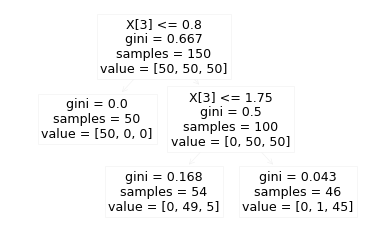

In [304]:
from sklearn import tree
tree.plot_tree(model)

In [321]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [330]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=3)
model=DecisionTreeClassifier(random_state=0,max_depth=2)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [332]:
y_predict=model.predict(X_test)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
93.33333333333333


In [401]:
import random
ps=1000
genes="qwertyuiopasdfghjklzxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM  123456789.!"
target="How I met your mother..!"
class Ind:
    def __init__(self,chromosome):
        self.chromosome=chromosome
        self.fitness=self.calFit()
        
    @classmethod
    def muted(self):
        global genes
        return random.choice(genes)
    @classmethod
    def g(self):
        global target
        tl=len(target)
        return [self.muted() for _ in range(tl)]
    def mate(self,p2):
        global target
        newchild=[]
        for i in range(len(target)):
            prob=random.random()
            if prob<0.45:
                newchild.append(self.chromosome[i])
            elif prob<0.90:
                newchild.append(p2.chromosome[i])
            else:
                newchild.append(self.muted())
        return Ind(newchild)
        
    def calFit(self):
        global target
        fit=0
        for gs,gp in zip(self.chromosome,target):
            if gs!=gp:
                fit+=1
        return fit
if __name__=="__main__":
    global ps
    pop=[]
    gen=1
    for _ in range(ps):
        pop.append(Ind(Ind.g()))
    found=False
    while not found:
        pop=sorted(pop,key=lambda x:x.fitness)
        if pop[0].fitness<=0:
            print("\nTarget Reached")
            print("Gen {} String {} Fitness {}".format(gen,"".join(pop[0].chromosome),pop[0].fitness))
            found=True
            break
        newgen=[]
        newgen.extend(pop[:10])
        #found=True
        s=90*ps/100
        for i in range(int(s)):
            p1=random.choice(pop[:50])
            p2=random.choice(pop[:50])
            child=p1.mate(p2)
            newgen.append(child)
        pop=newgen
        print("Gen {} String {} Fitness {}".format(gen,"".join(pop[0].chromosome),pop[0].fitness))
        gen+=1
        

Gen 1 String WKoAzYmeoWxvTK kHHneMm2z Fitness 20
Gen 2 String TKNS5Ymeok2E1K mHHveMO2e Fitness 19
Gen 3 String 5oq z me2 hCTe kmH7eMQ21 Fitness 16
Gen 4 String How ZO5em p7u6cmGt7Grg.7 Fitness 13
Gen 5 String HoNSIbmeKLfQ1r mot6pE..! Fitness 11
Gen 6 String zow q met Moug mHth 9..P Fitness 8
Gen 7 String Wow U mit 48ur motherm.! Fitness 6
Gen 8 String How I met  8ur mothe7..! Fitness 3
Gen 9 String How I met  8ur mothe7..! Fitness 3
Gen 10 String How ! met pour mother..! Fitness 2
Gen 11 String How I met dour mother..! Fitness 1

Target Reached
Gen 12 String How I met your mother..! Fitness 0


In [392]:
s

90.0